
<div style="text-align: center;">
    <strong style="display: block; margin-bottom: 10px;">Group ??</strong> 
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Fábio Santos</td>
            <td style="border: 1px solid white; padding: 8px;">2024</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Joana Rodrigues</td>
            <td style="border: 1px solid white; padding: 8px;">20240603</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Mara Simões</td>
            <td style="border: 1px solid white; padding: 8px;">20240326</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Matilde Street</td>
            <td style="border: 1px solid white; padding: 8px;">20240523</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Gustavo Gomes</td>
            <td style="border: 1px solid white; padding: 8px;">20240657</td>
        </tr>
    </table>
</div>

### 🔗 Table of Contents <a id='table-of-contents'></a>
1. [Imports](#imports)
---

# 1. Import Libraries

In [ ]:
from kedro_datasets.pandas import ParquetDataset

In [ ]:
# settings_store = {
#     "FS_API_KEY": "HBabVaRau84YyvfA.18j6Pgj4l47B9aIU4SM3fJ9mymneSG0EoacH2uvKn8DMqY9rPO4zVxIDOpQhwT02",
#     "FS_PROJECT_NAME": "MLOps25"}

In [ ]:
# import hopsworks

# project = hopsworks.login(
#     api_key_value=settings_store["FS_API_KEY"],
#     project=settings_store["FS_PROJECT_NAME"]
# )

# fs = project.get_feature_store()


2025-06-21 11:52:35,561 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-06-21 11:52:35,568 INFO: Initializing external client
2025-06-21 11:52:35,570 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-06-21 11:52:42,428 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1236145


Import necessary libraries.

In [585]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap
import mlflow
import logging
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Setting colour pallet.

In [586]:
main_palette = ["#BED62F", "#5C666C", "#A3B18A", "#D9D9D6", "#3A4F52", "#2E2F2F", "#D4E09B", "#ADC178", "#52796F", "#354F52", "#C6D8AF", "#8C9C92", "#7A9E9F", "#A5A58D", "#6B705C", "#FFEFAF", "#B5838D", "#E5989B", "#A98467", "#B7B7A4"]

## 2. Data Integration

Import the data from our dataset named "Listings_paris". It is a version of the dataset named "Listings" from maveanalytics.io but filtered only for Paris (https://mavenanalytics.io/data-playground?order=number_of_records%2Cdesc).

In [587]:
listings = pd.read_csv('Listings_paris.csv', encoding='latin1')
listings.head().T

,0,1,2,3,4
listing_id,281420,3705183,4082273,4797344,4823489
name,"Beautiful Flat in le Village Montmartre, Paris",39 mÃÂÃÂÃÂÃÂ² Paris (Sacre CÃÂÃÂ ÃÂ...,"Lovely apartment with Terrace, 60m2",Cosy studio (close to Eiffel tower),Close to Eiffel Tower - Beautiful flat : 2 rooms
host_id,1466919,10328771,19252768,10668311,24837558
host_since,2011-12-03,2013-11-29,2014-07-31,2013-12-17,2014-12-14
host_location,"Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France"
host_response_time,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,NaN,NaN,NaN,NaN
host_is_superhost,f,f,f,f,f
host_total_listings_count,1.0,1.0,1.0,1.0,1.0


## 2.1. Data Description

| Feature                       | Description |
|------------------------------|-------------|
| `listing_id`                 | Unique identifier for each Airbnb listing. |
| `name`                       | Title or name of the Airbnb listing, usually provided by the host. |
| `host_id`                    | Unique identifier for the host who owns the listing. |
| `host_since`                 | Date when the host first joined Airbnb. |
| `host_location`              | Location information of the host. |
| `host_response_time`         | Average time the host takes to respond to inquiries. |
| `host_response_rate`         | Percentage of messages the host responds to. |
| `host_acceptance_rate`       | Percentage of booking requests accepted by the host. |
| `host_is_superhost`          | Whether the host is a Superhost. |
| `host_total_listings_count`  | Total number of listings managed by the host. |
| `host_has_profile_pic`       | Whether the host has uploaded a profile picture. |
| `host_identity_verified`     | Whether the host has verified their identity on Airbnb. |
| `neighbourhood`              | Local neighborhood where the listing is located. |
| `district`                   | District where the listing is located. |
| `city`                       | City where the listing is located. |
| `latitude`                   | Latitude coordinate of the listing. |
| `longitude`                  | Longitude coordinate of the listing. |
| `property_type`              | Type of property listed. |
| `room_type`                  | Type of room offered. |
| `accomodates`                | Maximum number of guests the listing can host. |
| `bedrooms`                   | Number of bedrooms available to guests. |
| `amenities`                  | List of amenities offered. |
| `price`                      | Price per night. |
| `minimum_nights`             | Minimum number of nights required per booking. |
| `maximum_nights`             | Maximum number of nights allowed per booking. |
| `review_scores_rating`       | Overall average rating given by guests. |
| `review_scores_accuracy`     | Rating for how accurate the listing description is. |
| `review_scores_cleanliness`  | Rating for the cleanliness of the listing. |
| `review_scores_checkin`      | Rating for the ease and quality of the check-in process. |
| `review_scores_communication`| Rating for communication with the host. |
| `review_scores_location`     | Rating for the listing's location. |
| `review_scores_value`        | Rating for the value for money. |
| `instant_bookable`           | Whether the listing supports instant booking. |

# 3. Data Type Inspection

Checking for data types in the data.

In [588]:
print(listings.shape)
print(listings.columns)
print(listings.dtypes)

(47468, 33)
Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')
listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acc

In [589]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,47468.0,2.246937e+07,1.419277e+07,3109.00000,9.342157e+06,2.143567e+07,3.551085e+07,4.809185e+07
host_id,47468.0,6.703185e+07,8.834214e+07,2626.00000,9.618379e+06,2.867929e+07,8.074145e+07,3.871240e+08
host_response_rate,16527.0,8.623350e-01,2.778624e-01,0.00000,8.900000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,23192.0,7.980019e-01,3.087396e-01,0.00000,7.100000e-01,9.700000e-01,1.000000e+00,1.000000e+00
host_total_listings_count,47468.0,8.032569e+00,3.165403e+01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.020000e+02
district,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,47468.0,4.886467e+01,1.827897e-02,48.81317,4.885140e+01,4.886599e+01,4.887962e+01,4.890491e+01
longitude,47468.0,2.347025e+00,3.284368e-02,2.23838,2.326570e+00,2.349650e+00,2.372100e+00,2.461390e+00
accommodates,47468.0,3.044472e+00,1.598496e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,38384.0,1.372447e+00,9.653278e-01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01


In [590]:
listings.describe(include='object').T

,count,unique,top,freq
name,47417,45009,studio,21
host_since,47468,3705,2013-04-23,257
host_location,47468,1,"Paris, Ile-de-France, France",47468
host_response_time,16527,4,within an hour,8209
host_is_superhost,47468,2,f,41023
host_has_profile_pic,47468,2,t,47366
host_identity_verified,47468,2,t,38209
neighbourhood,47468,20,Buttes-Montmartre,5672
city,47468,1,Paris,47468
property_type,47468,62,Entire apartment,38020


#### Data Types Conclusions
- The columns `listing_id`, `host_id`, `accommodates`, `price`, `minimum_nights`, and `maximum_nights` are of type `int32` and seems correct. 
- Geolocation columns `latitude`, `longitude`, `host_response_time`, `host_acceptance_rate` and all  `review_scores_X` alike columns are of type `float64` and also seems correct.
- The `bedrooms` is of type `float64`, but should be a discrete integer. Needs further investigation. 
- Categorical features such as `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, `property_type`, `room_type`, and `instant_bookable` are stored as `object` and represent binary or qualitative information. Booleans variables can be converted to zeros and ones. 
- The `host_since` column is stored as a `string` (`object`) but represents dates; it should be converted to a `datetime` type for time-based analysis.
- Text-rich columns like `amenities` and `name` are unstructured `object` types and may require parsing or natural language processing (NLP) for advanced insights. Which are not in the scope of this project. 
- Overall, the dataset is well-structured, but **data cleaning and type conversion** are needed before deeper exploration or modeling.

DateType feature `host_since` later will be feature engineered into two new features: `host_days_active` and `host_years_active`. Using most max date as most recent day.

In [591]:
def convert_to_datetime(df):
    date_cols = ["host_since"]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

convert_to_datetime(listings)

We need to convert boolean features.

In [592]:
def convert_to_bool(df):
    bool_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]
    mapping={'t': True, 'f': False, 'True': True, 'False': False}
    df[bool_cols] = df[bool_cols].replace(mapping).astype(bool)

convert_to_bool(listings)

C:\Users\Fábio Dos Santos\AppData\Local\Temp\ipykernel_7680\3847389105.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_cols] = df[bool_cols].replace(mapping).astype(bool)


# 4. Missing Values Inspection

In [593]:
def missing_summary(df):
    missing_percent = (df.isnull().mean() * 100).round(2)
    missing_count = df.isnull().sum()
    dtypes = df.dtypes
    
    summary = pd.DataFrame({
        'missing_percent': missing_percent,
        'missing_count': missing_count,
        'dtype': dtypes
    })
    
    summary = summary[summary['missing_count'] > 0].sort_values(by='missing_percent', ascending=False)
    
    print(summary)
    
    missing_value_columns = summary.index.tolist()
    return missing_value_columns


missing_value_columns = missing_summary(listings)

                             missing_percent  missing_count    dtype
district                              100.00          47468  float64
host_response_rate                     65.18          30941  float64
host_response_time                     65.18          30941   object
host_acceptance_rate                   51.14          24276  float64
review_scores_location                 22.27          10569  float64
review_scores_checkin                  22.27          10570  float64
review_scores_value                    22.26          10568  float64
review_scores_communication            22.24          10557  float64
review_scores_accuracy                 22.24          10556  float64
review_scores_cleanliness              22.22          10549  float64
review_scores_rating                   22.16          10520  float64
bedrooms                               19.14           9084  float64
name                                    0.11             51   object


#### Missing Value Conclusions
- A notable number of variables (e.g., `review_scores_rating`, `review_scores_accuracy`, `review_scores_cleanliness`, etc.) have missing values in **16,xxx rows**, suggesting that a considerable portion of listings may not have any reviews.
- The variable `district` has **64,690** missing values, which likely means this attribute is not consistently reported or available for the majority of listings. It can be safely dropped. 
- The variables `host_response_time` and `host_response_rate` both have **41,344** missing entries, suggesting that many hosts might not have been bothered that much by the people who was renting their listing.
- Variable `bedrooms` has **13,404** missing values, which could mean that the data collection process did not capture bedroom count for many listings, or those listings might be shared rooms or unconventional spaces.
- Some host-related attributes like `host_location`, `host_acceptance_rate`, and `review_scores_*` variables have substantial missing data, indicating potential inconsistencies in host profile completeness or listing activity.
- Overall, the dataset has several well-populated core attributes, but auxiliary or review-related fields have significant missingness, which may affect downstream analysis depending on the focus.
- More then one `host_x` alike features has exactaly 33 missing values. This needs to be investigated.

**Dropped Columns Summary:**

* `city` had only one unique value ("Paris") since the dataset was pre-filtered to focus exclusively on listings in Paris.
* `host_location` also had only one unique value and was therefore redundant for analysis.
* `district` contained only missing (`NaN`) values across all rows (paris doesn't have districts like the USA) making it irrelevant for the current scope of the project.
* `name` has high cardinality, unstructured text format, and lack of relevance for structured analysis.

Checking `host_x` missing values overlap.

In [594]:
def count_null_overlaps(df, cols):
    """
    For a given Pandas DataFrame `df` and list of column names `cols`:
      - Counts rows where all of `cols` are null.
      - Counts rows where some but not all of `cols` are null.
    Prints both counts.
    """

    # Create a boolean mask for the nulls in the selected columns
    is_null = df[cols].isnull()

    # All null: every value in the row is NaN
    all_null = is_null.all(axis=1)

    # Any null: at least one value in the row is NaN
    any_null = is_null.any(axis=1)

    # Some but not all nulls
    partial_null = any_null & ~all_null

    # Count them
    all_null_count = all_null.sum()
    partial_null_count = partial_null.sum()

    # Output
    print(f"Rows with all {len(cols)} columns null at once: {all_null_count:,}")
    if all_null_count == 0 and partial_null_count == 0:
        print("There are no null values in any of these columns.")
    elif partial_null_count == 0:
        print("No partial overlaps: whenever one is null, they’re all null together.")
    else:
        print(f"Found {partial_null_count:,} rows with some nulls but not all.")

    return all_null_count, partial_null_count

cols = ['host_since',
    'host_is_superhost',
    'host_total_listings_count',
    'host_has_profile_pic',
    'host_identity_verified']

count_null_overlaps(listings, cols)

Rows with all 5 columns null at once: 0
There are no null values in any of these columns.


(np.int64(0), np.int64(0))

Sanity check:

In [595]:
listings[cols].isnull().sum()


host_since                   0
host_is_superhost            0
host_total_listings_count    0
host_has_profile_pic         0
host_identity_verified       0
dtype: int64

Separating columns into numerical, categorical, boolean and datetime.

In [596]:
def identify_data_types(df, info=False):
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    boolean_features = df.select_dtypes(include=['bool']).columns.tolist()
    datetime_features = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
    
    if info == True:
        print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
        print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
        print(f"Boolean features ({len(boolean_features)}): {boolean_features}")
        print(f"Datetime features ({len(datetime_features)}): {datetime_features}")
    
    return numerical_features, categorical_features, boolean_features, datetime_features

numerical_features, categorical_features, boolean_features, datetime_features = identify_data_types(listings)

# 5. Descriptive Statistics and Feature Exploration

Checking descriptive statistics and visualizations of the dataset features.

In [597]:
listings.describe().T

,count,mean,min,25%,50%,75%,max,std
listing_id,47468.0,22469369.60308,3109.0,9342156.75,21435667.5,35510849.25,48091852.0,14192765.473948
host_id,47468.0,67031849.878234,2626.0,9618379.0,28679288.5,80741451.0,387123964.0,88342135.420437
host_since,47468,2015-05-16 23:21:52.041796608,2008-08-30 00:00:00,2013-10-31 00:00:00,2015-03-15 00:00:00,2016-07-03 00:00:00,2021-02-03 00:00:00,NaN
host_response_rate,16527.0,0.862335,0.0,0.89,1.0,1.0,1.0,0.277862
host_acceptance_rate,23192.0,0.798002,0.0,0.71,0.97,1.0,1.0,0.30874
host_total_listings_count,47468.0,8.032569,0.0,1.0,1.0,2.0,302.0,31.654025
district,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,47468.0,48.864668,48.81317,48.8514,48.86599,48.87962,48.90491,0.018279
longitude,47468.0,2.347025,2.23838,2.32657,2.34965,2.3721,2.46139,0.032844
accommodates,47468.0,3.044472,0.0,2.0,2.0,4.0,16.0,1.598496


#### **Key Observations & Data Understanding**

Based on the initial data exploration, we've gained several insights into the dataset's structure and characteristics:

*   **Categorical String Features:**
    *   `host_response_time`: Contains descriptive string values (e.g., 'a few days or more', 'within an hour') rather than numerical response times.
*   **Numerical Percentage Features:**
    *   `host_response_rate`, `host_acceptance_rate`: Values range between 0 and 1, strongly suggesting they represent percentages.
*   **Boolean Features:**
    *   `host_is_superhost`
    *   `host_has_profile_pic`
    *   `host_identity_verified`
    *   `instant_bookable`
*   **Geospatial Features:**
    *   `latitude`, `longitude`: Values are tightly clustered, consistent with the dataset focusing on listings within Paris.
*   **Standard Categorical Features:**
    *   `neighbourhood`: Appears to be in good order.
    *   `city`: Appears to be in good order.
    *   `property_type`, `room_type`: Appear to be in good order.
*   **List-based Feature (Requires Transformation):**
    *   `amenities`: Represented as lists of strings. These will need to be unpacked into individual binary features for analysis.
        *   **Anomaly Noted:** A peculiar minimum value was observed: `"2 r\u00e9frig\u00e9rateur encastr\u00e9s refrigerator"`, which requires cleaning.

---

### **Potential Data Quality Issues & Areas for Investigation**

Several features exhibit characteristics that warrant further investigation and potential cleaning:

*   **Outliers & Implausible Values:**
    *   `host_total_listings_count`: A significant outlier exists (max: 1105 listings vs. mean: ~12).
    *   `accommodates`, `bedrooms`: Exhibit high maximum values that seem unusually large and should be verified.
    *   `price` (Target Variable): Has a minimum value of 0, which is unrealistic for rental listings.
    *   `minimum_nights`, `maximum_nights`: Display extremely high maximum values (e.g., 9,999 and 10,000,000 respectively), likely acting as placeholders or indicating data entry errors.
*   **Deprecated Feature:**
    *   `district`: This feature appears deprecated and carries no meaningful information. It can likely be dropped.
*   **Curious Pattern:**
    *   `review_X` features (e.g., `number_of_reviews`, `review_scores_rating`, etc.): All noted `review_X` features share a minimum value of 2 and a mean around 9. While not necessarily an error, this consistent pattern is worth noting and understanding in context.

# 6. Numerical Features

## 6.1. Listings_id

Our main concern about this feature is if there are any duplicate listings. Later it will be dropped in the preprocessment, since it dont carries any meaniful information for prediction. 

In [598]:
total_rows   = len(listings)                          
distinct_ids = listings["listing_id"].nunique()      
duplicates   = total_rows - distinct_ids              

print(f"Total rows       : {total_rows:,}")
print(f"Distinct IDs     : {distinct_ids:,}")
print(f"Duplicate rows   : {duplicates:,}")

Total rows       : 47,468
Distinct IDs     : 47,468
Duplicate rows   : 0


In [599]:
cols_to_drop = ['listing_id']

## 6.2 Host_id

This feature will also be dropped in preprocessment. Just by curiosity we assess how many duplicates we have, which are no problem since a host can have more than one listing. 

In [600]:
total_rows   = len(listings)                          
distinct_ids = listings["host_id"].nunique()      
duplicates   = total_rows - distinct_ids              

print(f"Total rows       : {total_rows:,}")
print(f"Distinct IDs     : {distinct_ids:,}")
print(f"Duplicate rows   : {duplicates:,}")

Total rows       : 47,468
Distinct IDs     : 39,007
Duplicate rows   : 8,461


In [601]:
cols_to_drop.append('host_id')

## 6.3 Host Since 

This is DateType as mention before feature was broken down into 2 columns that are more compatible to ML models. And so it will be dropped. 

In [602]:
cols_to_drop.append('host_since')

## 6.4 Host Response Rate

In [603]:
def inspect_missing(df: pd.DataFrame, column_name: str, *, random_state=None):
    """
    Prints the percentage of missing values in `column_name`
    and displays 10 random rows where that column is null.

    Parameters
    ----------
    df : pd.DataFrame
    column_name : str
        Name of the column to inspect.
    random_state : int or None, optional
        Seed for reproducible sampling (passed to DataFrame.sample).
    """

    # --- counts ----------------------------------------------------
    total_count   = len(df)
    missing_mask  = df[column_name].isna()          # True where value is NaN/None
    missing_count = missing_mask.sum()

    # --- output summary -------------------------------------------
    missing_pct = (missing_count / total_count * 100) if total_count else 0.0
    print(f"{column_name}: {missing_count:,} missing out of {total_count:,}"
          f" → {missing_pct:.2f}% missing")

    # --- display sample rows --------------------------------------
    if missing_count:
        sample_rows = df[missing_mask].sample(
            n=min(10, missing_count), random_state=random_state
        )
        print(f"\nShowing {len(sample_rows)} random rows where `{column_name}` is null:")
        display(sample_rows)
    else:
        print(f"\nNo rows where `{column_name}` is null.")

inspect_missing(listings, 'host_response_rate')

host_response_rate: 30,941 missing out of 47,468 → 65.18% missing

Showing 10 random rows where `host_response_rate` is null:


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
43819,13600359,"2p 45m2, calme et cosy Paris 11",73550603,2016-05-23,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,4,10,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False
45038,19774008,Ravissant 3 piÃÂÃÂÃÂÃÂ¨ces Parisien dan...,139590442,2017-07-10,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,30,96.0,10.0,9.0,10.0,10.0,10.0,10.0,False
9155,44408952,Magnifique 4 piÃÂÃÂÃÂÃÂ¨ces quartier Mo...,22073122,2014-10-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,8,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
18127,34223976,2 bedrooms Apartment behind Montmartre in the ...,50370765,2015-12-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,2.0,...,3,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
8805,35683160,Appartement 83m2 aux Buttes Chaumont,4813692,2013-01-23,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,4,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
26496,12032199,Chambre dans bel appartement Alesia,23389265,2014-11-05,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
10566,34293340,Superb apartment close to the Opera Garnier -...,258912742,2019-04-30,"Paris, Ile-de-France, France",NaN,NaN,1.0,False,1.0,...,1,1125,92.0,9.0,9.0,9.0,9.0,10.0,9.0,False
5768,17140548,"Beau Studio lumineux, calme proche Place d'Italie",40994446,2015-08-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,8,1125,89.0,9.0,8.0,9.0,9.0,9.0,10.0,True
39958,30001861,Joli petit appartement ÃÂÃÂÃÂÃÂ Paris,8790254,2013-09-12,"Paris, Ile-de-France, France",NaN,NaN,1.0,False,1.0,...,3,15,90.0,9.0,9.0,10.0,10.0,10.0,9.0,False
2969,4473891,Large beautiful and quiet flat.,6246864,2013-05-06,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


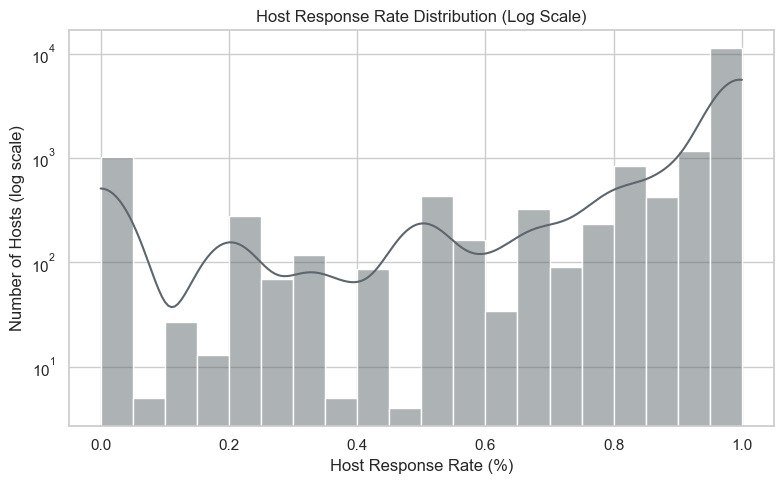

In [604]:
# Keep only non‑null response‑rate values
response_rate_data = (
    listings.loc[listings["host_response_rate"].notna(), ["host_response_rate"]]
)

# Plot the distribution (log‑scaled y‑axis)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=response_rate_data,
    x="host_response_rate",
    bins=20,
    kde=True,
    color="#5C666C"
)
plt.yscale("log")
plt.title("Host Response Rate Distribution (Log Scale)")
plt.xlabel("Host Response Rate (%)")
plt.ylabel("Number of Hosts (log scale)")
plt.tight_layout()
plt.show()

Since alomst 2/3 of the values are null, there is not sufficient information to conclude if it is not missing at random and imputation will bias our model, this feature will be dropped.

In [605]:
cols_to_drop.append('host_response_rate')

## 6.6. Host Acceptance Rate

In [606]:
inspect_missing(listings, 'host_acceptance_rate')

host_acceptance_rate: 24,276 missing out of 47,468 → 51.14% missing

Showing 10 random rows where `host_acceptance_rate` is null:


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
12378,25557188,Appartement familial en lisiÃÂÃÂÃÂÃÂ¨re...,67019870,2016-04-13,"Paris, Ile-de-France, France",within a few hours,1.0,NaN,False,1.0,...,2,1125,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False
24057,6037764,Cosy & calm flat in Paris center,31335563,2015-04-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,7,1125,84.0,10.0,8.0,10.0,10.0,9.0,10.0,False
15733,5547709,Bel appartement central,4247621,2012-11-26,"Paris, Ile-de-France, France",a few days or more,0.0,NaN,False,2.0,...,1,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
2512,42487635,Appartement de charme ÃÂÃÂÃÂÃÂ 2 pas d...,17541249,2014-07-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8681,25050150,Beau 3 piÃÂÃÂÃÂÃÂ¨ces - Nice 3 rooms fl...,5305151,2013-03-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True
5662,7045262,Studio de charme proche Tour Eiffel,36943983,2015-06-28,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,5,1125,94.0,10.0,9.0,10.0,9.0,9.0,8.0,False
24212,8519352,Room in apartment with flatmates,44858124,2015-09-22,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,96.0,10.0,10.0,9.0,9.0,8.0,9.0,False
759,33368962,Charming apmt in the heart of the Latin quarter,10802850,2013-12-25,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,6,1125,96.0,10.0,9.0,10.0,10.0,10.0,10.0,False
108,19797495,"Love nest in the center of Paris, Ile de la Cite.",23742945,2014-11-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True
41301,3412682,Cosy typical parisian 3 Rooms Flat,17206415,2014-06-24,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,50,92.0,10.0,10.0,10.0,9.0,10.0,10.0,False


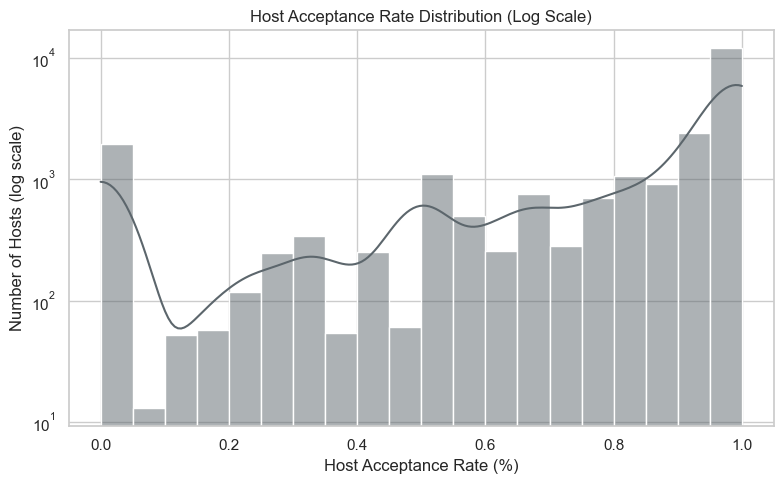

In [607]:
# Keep only non‑null response‑rate values
acceptance_data = (
    listings.loc[listings["host_acceptance_rate"].notna(), ["host_acceptance_rate"]]
)

# Plot the distribution (log‑scaled y‑axis)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=acceptance_data,
    x="host_acceptance_rate",
    bins=20,
    kde=True,
    color="#5C666C"
)
plt.yscale("log")
plt.title("Host Acceptance Rate Distribution (Log Scale)")
plt.xlabel("Host Acceptance Rate (%)")
plt.ylabel("Number of Hosts (log scale)")
plt.tight_layout()
plt.show()

Since alomst 1/2 of the values are null; there is not sufficient information to conclude if it is not missing at random; and imputation will bias our model, this feature will be dropped.

In [608]:
cols_to_drop.append('host_acceptance_rate')

## 6.7. Host Total Listing Count

In [525]:
# Filter rows where host_total_listings_count == 0
zero_df = listings[listings["host_total_listings_count"] == 0]

# Count how many such rows there are
zero_count = len(zero_df)
print(f"Number of rows with host_total_listings_count = 0: {zero_count:,}")

# Show first 10 rows (or fewer if less than 10)
display(zero_df.head(10))

Number of rows with host_total_listings_count = 0: 5,095


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
14035,47355968,Charmant appartement parisien - 2/4 voyageurs,11716309,2014-01-28,"Paris, Ile-de-France, France",within a few hours,0.88,0.33,False,0.0,...,5,1125,100.0,10.0,10.0,10.0,8.0,8.0,8.0,False
14044,840429,Beautiful studio Menilmontant,4389298,2012-12-12,"Paris, Ile-de-France, France",within a day,0.90,0.57,False,0.0,...,5,1125,88.0,9.0,8.0,9.0,9.0,9.0,9.0,False
14045,1272342,Charming Studio Paris Centre,6618901,2013-05-28,"Paris, Ile-de-France, France",within a few hours,0.75,0.50,False,0.0,...,15,1125,81.0,9.0,8.0,10.0,10.0,9.0,8.0,False
14051,3633049,Cosy appartment/Nid douillet 20ÃÂÃÂÃÂÃÂ¨me,18315024,2014-07-18,"Paris, Ile-de-France, France",within a few hours,0.63,1.00,False,0.0,...,9,1125,96.0,10.0,9.0,9.0,10.0,9.0,9.0,False
14055,11314689,appartement ÃÂÃÂÃÂÃÂ Montmartre,12827900,2014-03-05,"Paris, Ile-de-France, France",within a few hours,0.88,0.60,False,0.0,...,4,1125,96.0,9.0,10.0,10.0,10.0,9.0,10.0,False
14076,12102037,Charming studio near Eiffel Tower,60262647,2016-02-24,"Paris, Ile-de-France, France",a few days or more,0.00,0.00,False,0.0,...,10,1125,93.0,9.0,10.0,10.0,10.0,8.0,9.0,False
14142,35964009,Joli nid ÃÂÃÂÃÂÃÂ l'arc de triomphe!,268932582,2019-06-16,"Paris, Ile-de-France, France",a few days or more,0.00,NaN,False,0.0,...,15,1125,100.0,10.0,8.0,8.0,10.0,10.0,10.0,False
14170,5053522,Atypical amazing flat in ÃÂÃÂ¢ÃÂ¢ÃÂÃÂ¬Ã...,3828081,2012-10-10,"Paris, Ile-de-France, France",within a day,0.90,0.82,True,0.0,...,29,1125,90.0,9.0,8.0,9.0,9.0,10.0,9.0,False
14229,43829164,Paris : Studio sur rue pietonne,110404695,2017-01-08,"Paris, Ile-de-France, France",a few days or more,0.00,0.75,False,0.0,...,7,1125,100.0,9.0,9.0,9.0,9.0,10.0,10.0,False
14243,6839557,Amazing flat in ÃÂÃÂ¢ÃÂ¢ÃÂÃÂ¬ÃÂ ÃÂOd...,3828081,2012-10-10,"Paris, Ile-de-France, France",within a day,0.90,0.82,True,0.0,...,29,1125,89.0,9.0,8.0,10.0,9.0,10.0,9.0,False


Checking if there is an inconsistent between `host_id` and `host_total_listings_count`

In [526]:
# 1) Identify host_ids where host_total_listings_count varies
host_counts = (
    listings.groupby("host_id")["host_total_listings_count"]
    .nunique()  # count distinct values per host_id
    .reset_index(name="distinct_count")
)

# Filter hosts with more than 1 distinct count value (inconsistent)
inconsistent_hosts = host_counts[host_counts["distinct_count"] > 1]["host_id"]

# 2) Filter listings for those hosts
inconsistent_rows = listings[listings["host_id"].isin(inconsistent_hosts)]

# 3) Sort by host_id
inconsistent_rows = inconsistent_rows.sort_values("host_id")

# 4) Display the problematic rows (in Jupyter or IPython)
display(inconsistent_rows)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


Grouping by `host_id` and counting lisitings to input in `host_total_listings_count`

In [527]:
# 1) For hosts with host_total_listings_count == 0, count how many listings they actually have
zero_hosts = listings[listings["host_total_listings_count"] == 0]

actual_counts = (
    zero_hosts.groupby("host_id")
    .size()
    .reset_index(name="actual_listings")
)

# 2) Left join these counts back to the original DataFrame
df_with_counts = listings.merge(actual_counts, on="host_id", how="left")

# 3) Overwrite host_total_listings_count only where it was 0
df_with_counts["host_total_listings_count"] = np.where(
    df_with_counts["host_total_listings_count"] == 0,
    df_with_counts["actual_listings"],
    df_with_counts["host_total_listings_count"]
)
listings = df_with_counts.drop(columns=["actual_listings"])


In [609]:
def fix_zero_total_listings(
    df: pd.DataFrame,
    host_id_col: str = "host_id",
    total_col: str = "host_total_listings_count",
) -> pd.DataFrame:
    """
    Replace *host_total_listings_count* values that are **0** by the
    actual number of listings each host owns (computed within the DataFrame).

    Parameters
    ----------
    df : pd.DataFrame
        Input listings table.
    host_id_col : str, default "host_id"
        Name of the host‑identifier column.
    total_col : str, default "host_total_listings_count"
        Column holding the host’s declared total listing count.

    Returns
    -------
    pd.DataFrame
        A copy of *df* where any 0s in *total_col* have been replaced by
        the host’s real listing count.  (Hosts that already had
        a positive number remain unchanged.)
    """
    df = df.copy()

    # 1️⃣  Build a Series: host_id → actual number of rows/listings
    actual_counts = (
        df.groupby(host_id_col)[host_id_col]
        .size()
        .rename("actual_listings")
    )

    # 2️⃣  Join that Series back to the DataFrame
    df = df.join(actual_counts, on=host_id_col)

    # 3️⃣  Overwrite zeros only
    df[total_col] = np.where(
        df[total_col] == 0,
        df["actual_listings"],
        df[total_col],
    )

    # 4️⃣  Clean up temp column
    df = df.drop(columns="actual_listings")

    return df

Sanity check if changes had any effect.

In [528]:
# Filter rows where host_total_listings_count == 0
zero_df = listings[listings["host_total_listings_count"] == 0]

# Count how many such rows there are
zero_count = len(zero_df)
print(f"Number of rows with host_total_listings_count = 0: {zero_count:,}")

# Display the filtered rows as a table
display(zero_df)

Number of rows with host_total_listings_count = 0: 0


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


## 6.8. Latitude and Longitude

Geographic details is already captured by the `neighbourhood` feature. That is why we decided to drop it. 

In [529]:
cols_to_drop.append('latitude')
cols_to_drop.append('longitude')

## 6.9. Accommodates

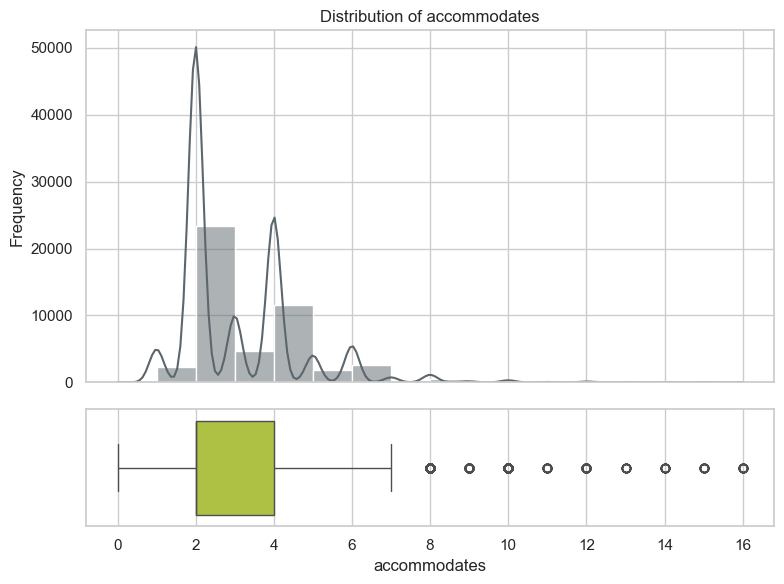

In [530]:
def plot_dist_and_box(
    df,
    cols,
    bins,
    hist_color: str = "#5C666C",
    box_color: str = "#BED62F",
):
    # Accept a single string or any iterable of strings
    if isinstance(cols, str):
        cols = [cols]

    sns.set_theme(style="whitegrid")

    for c in cols:
        if c not in df.columns:
            print(f"Column '{c}' not found – skipping.")
            continue

        # Pull only non-null rows for this column (Pandas version)
        pdf = df[c].dropna()

        # Skip empty or non-numeric data
        if pdf.empty or not pd.api.types.is_numeric_dtype(pdf):
            print(f"Column '{c}' is empty or non-numeric – skipping.")
            continue

        # Create the two-row figure
        fig, (ax_dist, ax_box) = plt.subplots(
            2, 1, figsize=(8, 6), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
        )

        # Histogram + KDE
        sns.histplot(pdf, bins=bins, kde=True, color=hist_color, ax=ax_dist)
        ax_dist.set_title(f"Distribution of {c}")
        ax_dist.set_xlabel("")  # Hide x-axis on the top panel
        ax_dist.set_ylabel("Frequency")

        # Horizontal box-plot
        sns.boxplot(x=pdf, orient="h", color=box_color, ax=ax_box)
        ax_box.set_xlabel(c)
        ax_box.set_yticks([])

        plt.tight_layout()
        plt.show()

plot_dist_and_box(listings, cols = 'accommodates', bins = 16)

Conclusions

- Most common number of guests is 2:

  The highest frequency occurs at 2 in the distribution of accommodates, indicating that listings for pairs of guests are most common.

- 2 to 4 guests are Most Prevalent:

  Listings that accommodate between 2 and 4 dominate the distribution, showing a platform focus on small-group travel.

- Higher Accommodate Counts Are Uncommon:

  Listings that accommodate more than 5 guests are rare, with frequency dropping off sharply beyond that point.

- Platform Skewed Toward Small-Scale Lodging:

  The shape of the distribution suggests that Airbnb listings are primarily intended for solo travelers, couples, or small families.

- **1. Winsorization of High `accommodates` Values:**
At higher ranges, differences between individual `accommodates` counts become negligible. To preserve the meaning of these large values while improving distribution, we will apply winsorization during preprocessing.

- **2. Dropping and Imputing Zero `accommodates` Values:**
An `accommodates` value of zero is do not make sense for an Airbnb listing. We will remove those values and later impute missing `accommodates` values in the training set using the median.

In [531]:
listings["accommodates"] = listings["accommodates"].replace(0, np.nan)

## 6.10. Bedrooms

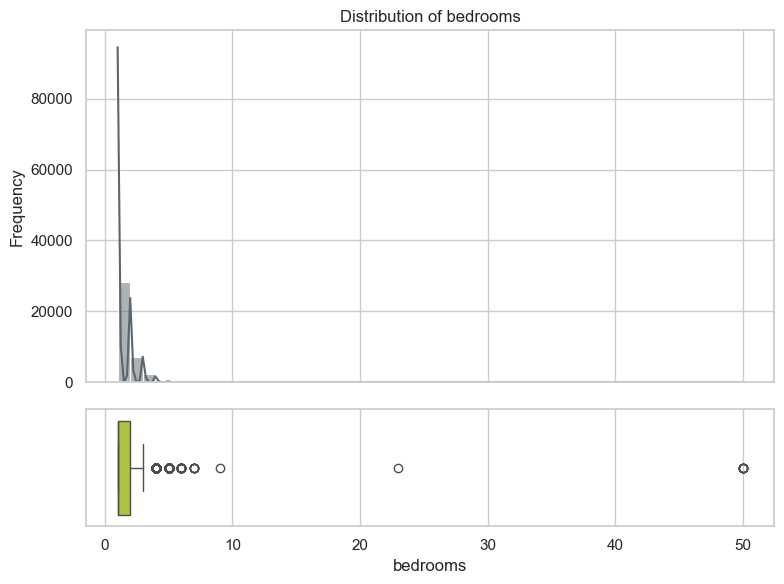

In [532]:
plot_dist_and_box(listings, cols = 'bedrooms', bins = 50)

Conclusions

- Most Listings Have Only 1 Bedroom:

  The distribution peaks at 1 bedroom, indicating that the majority of listings are compact units such as studios or one-bedroom apartments.

- Two-Bedroom Listings Are Moderately Common:

  Listings with 2 bedrooms show up with much lower but still notable frequency, catering to small families or groups.

- Listings With 3 or More Bedrooms Are Rare:

  There is a sharp drop in frequency beyond 2 bedrooms, and listings with more than 5 bedrooms are extremely uncommon.

- Platform Skewed Toward Small Spaces:

  The overall distribution suggests Airbnb primarily hosts properties suited for couples, solo travelers, and small groups.

- Limited Inventory for Large Groups:

  The scarcity of listings with many bedrooms may present a challenge for larger groups or extended families seeking accommodations.

In [614]:
high_bedrooms_count = (listings["bedrooms"] > 10).sum()

print(f"Number of rows with bedrooms > 10: {high_bedrooms_count:,}")

Number of rows with bedrooms > 10: 0


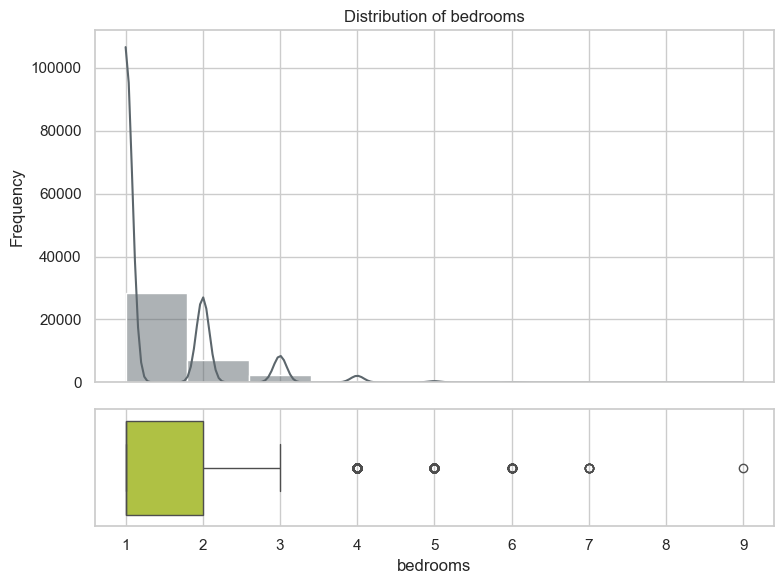

In [534]:
# 1) Filter out rows where bedrooms is zero or greater than 10
listings_filtered = listings[
    listings["bedrooms"].isnull() | (listings["bedrooms"] <= 10)
]

# 2) Plot on the filtered DataFrame
plot_dist_and_box(listings_filtered, cols="bedrooms", bins=10)

In [535]:
listings.shape

(47468, 33)

At higher ranges, differences between individual `bedrooms` counts become negligible. To preserve the meaning of these large values while improving distribution, we will apply winsorization during preprocessing.

## 6.11. Price (TARGET)

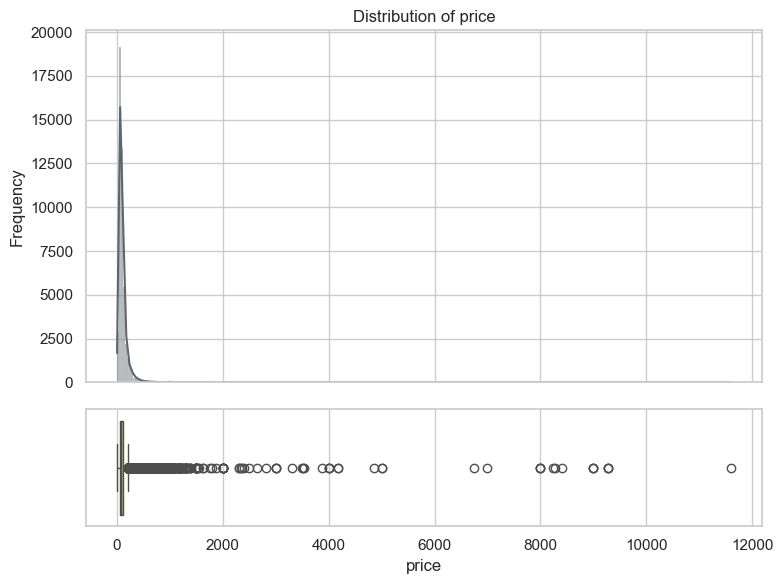

In [536]:
plot_dist_and_box(listings, cols = 'price', bins = 300)

Conclusions

- Most Listings Are Priced Below $150:

  The highest frequency occurs in the $50–$150 range, indicating that the majority of Airbnb listings fall within an affordable nightly rate.

- Price Distribution Is Right-Skewed:

  The long tail toward higher prices shows that while a few listings are expensive, most remain relatively budget-friendly.

- Luxury Listings Are Rare:

  Listings priced above $300 become progressively less common, with very few reaching the $1000 cap, likely representing high-end or niche offerings.

- Price Cap Reduces Outlier Impact:

  Capping at $1000 helps visualize the overall distribution without being skewed by extreme values, which are likely statistical outliers.

- Platform Remains Accessible to Budget Travelers:

  The distribution supports the idea that Airbnb is widely used for affordable accommodation, with pricing favoring typical travelers over luxury-seekers.

In [537]:
high_price_count = (listings["price"] > 500).sum()

print(f"Number of rows with price > 500: {high_price_count:,}")

Number of rows with price > 500: 543


To improve our data distribution and prevent bias in the model, we dropped all listings with a `price` above 500—these values are not representative of the majority of our dataset—and also removed any listings where `price` was zero, since a zero price does not make sense for an Airbnb listing.

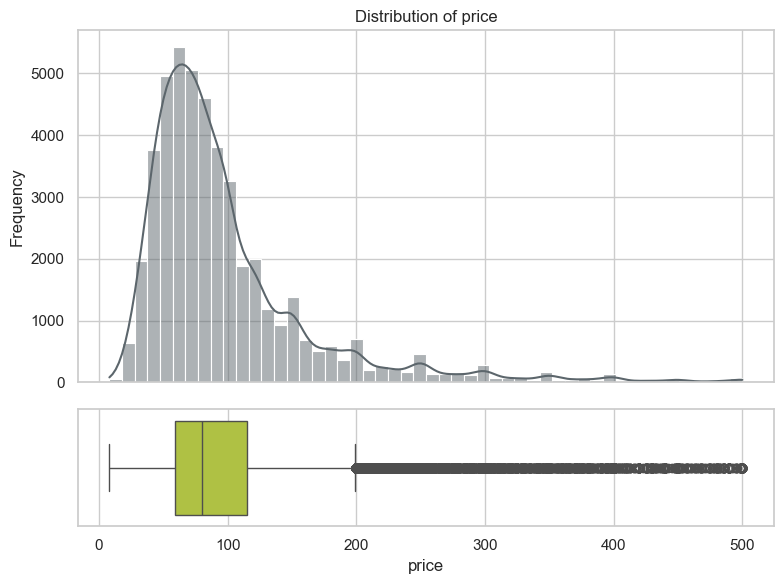

In [538]:
# 1) Filter rows where price > 0 and price <= 500
listings_filtered = listings[(listings["price"] > 0) & (listings["price"] <= 500)]

# 2) Plot on the filtered DataFrame
plot_dist_and_box(listings_filtered, cols="price", bins=50)

## 6.11. Minimum Nights 

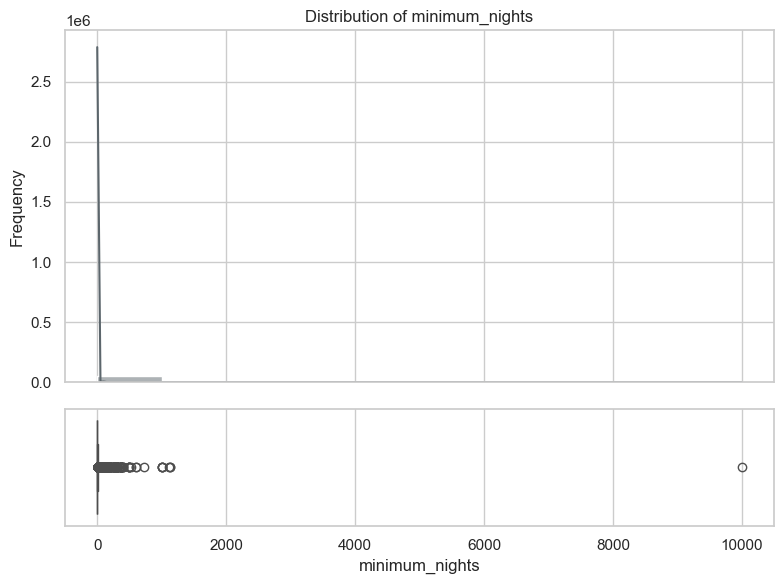

In [539]:
plot_dist_and_box(listings, cols = 'minimum_nights', bins = 10)

In [540]:
# Count rows where minimum_nights > 40
high_price_count = (listings["minimum_nights"] > 40).sum()

print(f"Number of rows with minimum_nights > 40: {high_price_count:,}")

Number of rows with minimum_nights > 40: 617


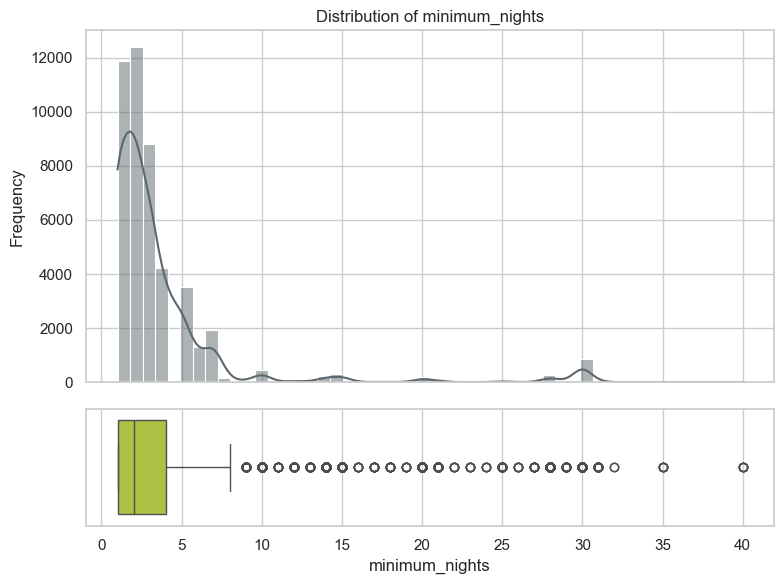

In [541]:
# 1) Filter rows where minimum_nights <= 40
listings_filtered = listings[listings["minimum_nights"] <= 40]

# 2) Plot on the filtered DataFrame
plot_dist_and_box(listings_filtered, cols="minimum_nights", bins=50)

Conclusions

- Most listings require a short minimum stay, typically between 1 and 7 nights. This is consistent with the nature of short-term rental platforms.

- The highest frequency is observed at 1 night, meaning many hosts allow one-night bookings, which may appeal to travelers seeking flexibility.

- The distribution is right-skewed, with a long tail extending toward higher values, indicating a small number of listings with unusually long minimum stay requirements.

- Several outliers exist with values over 20 nights — in some cases approaching 40 — suggesting that some hosts target medium- to long-term stays, or these values could be data anomalies.

- If the goal is to analyze short-term rental behavior, these high minimum-night listings might need to be treated separately or filtered out.

## 6.12. Maximum Nights 

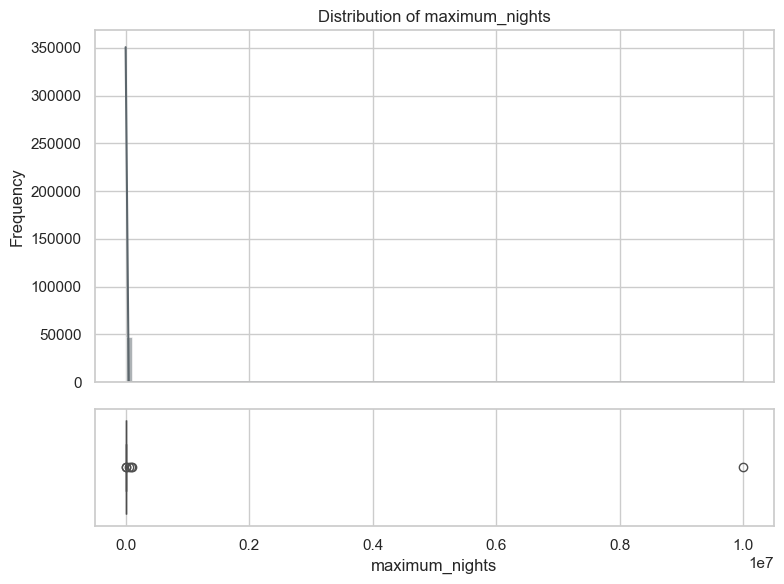

In [542]:
plot_dist_and_box(listings, cols = 'maximum_nights', bins = 100)

Drop clear outlier to improve visualization

In [543]:
high_max_nights_count = (listings["maximum_nights"] > 1150).sum()

print(f"Number of rows with maximum_nights > 1150: {high_max_nights_count:,}")

Number of rows with maximum_nights > 1150: 8


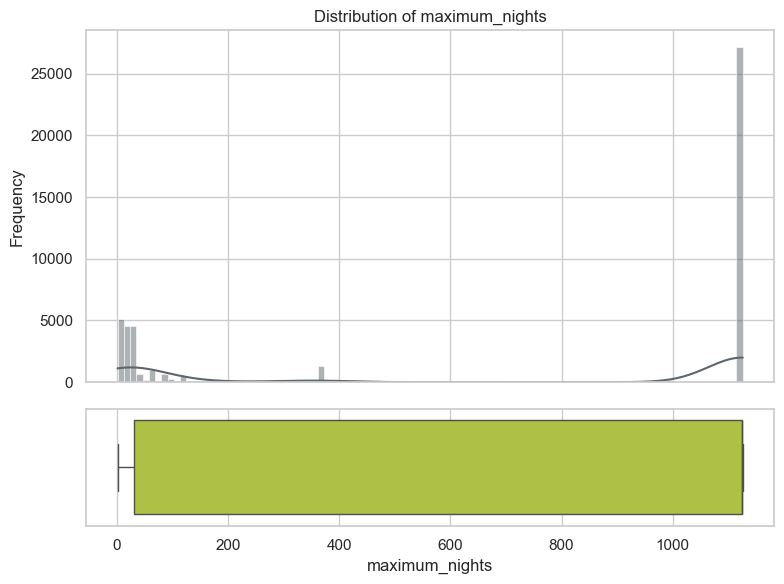

In [544]:
# Keep only rows where maximum_nights ≤ 1150
listings_filtered = listings[listings["maximum_nights"] <= 1150]

# Plot the distribution on the filtered DataFrame
plot_dist_and_box(listings_filtered, cols="maximum_nights", bins=100)

Conclusions

- The distribution of `maximum_nights` is heavily right-skewed, with a dense concentration of listings allowing bookings for short-to-moderate durations (especially below 100 nights).

- A prominent spike is visible at 1125 nights, which is likely a default or placeholder value used by the platform or by hosts who do not wish to set an explicit cap.

- The long right tail and the flat density between 200 and 1000 nights suggest that very high maximum stay limits are uncommon and irregular.

- The majority of listings appear to support both short and flexible longer stays, but the sharp peak at the high end may distort analysis and should be carefully handled.

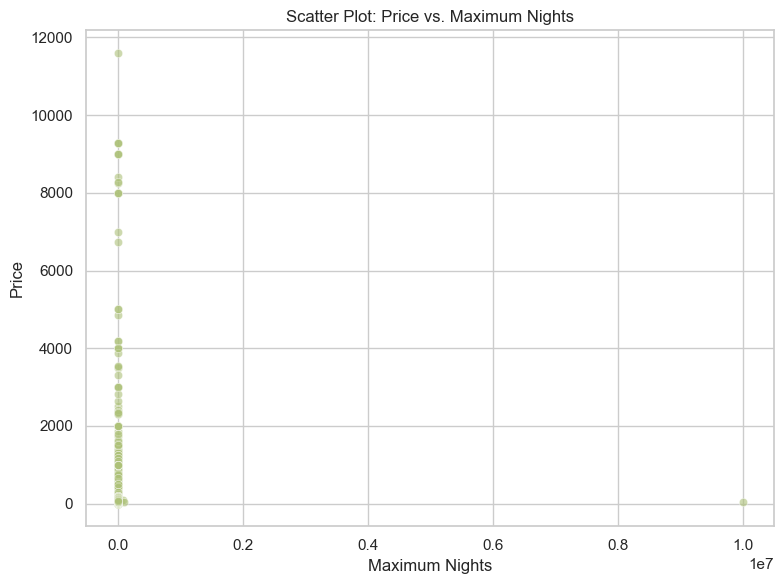

In [545]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=listings.dropna(subset=["price", "maximum_nights"]),
    x="maximum_nights",
    y="price",
    color="#ADC178",
    alpha=0.6
)
plt.xlabel("Maximum Nights")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs. Maximum Nights")
plt.tight_layout()
plt.show()

Since distribution is highly skewed and scatter with target don't seems to carry much information about it we will drop this feature later

In [546]:
cols_to_drop.append('maximum_nights')

## 6.13. All Review Scores 

In [547]:
review_cols = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
    ]

In [548]:
count_null_overlaps(listings, review_cols)

Rows with all 7 columns null at once: 10,515
Found 74 rows with some nulls but not all.


(np.int64(10515), np.int64(74))

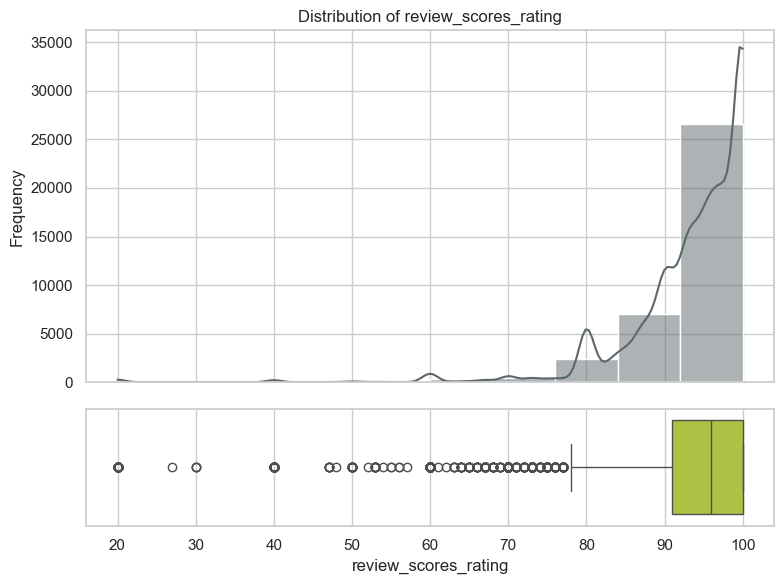

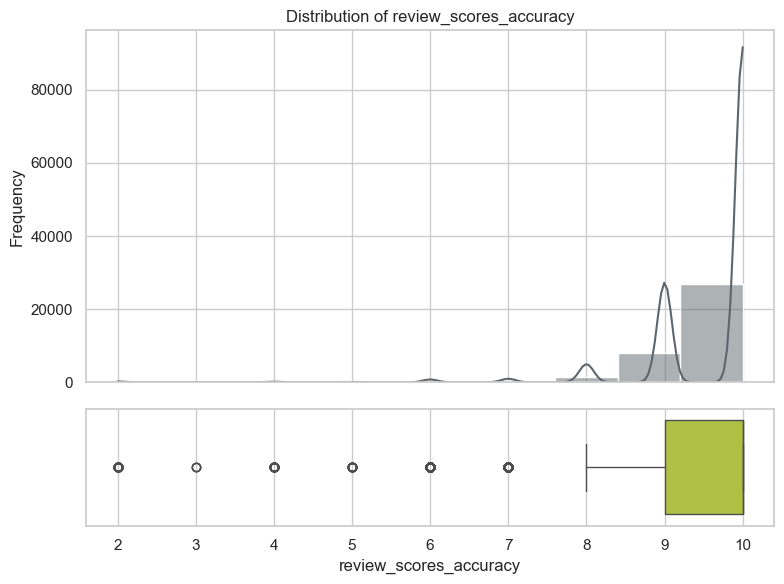

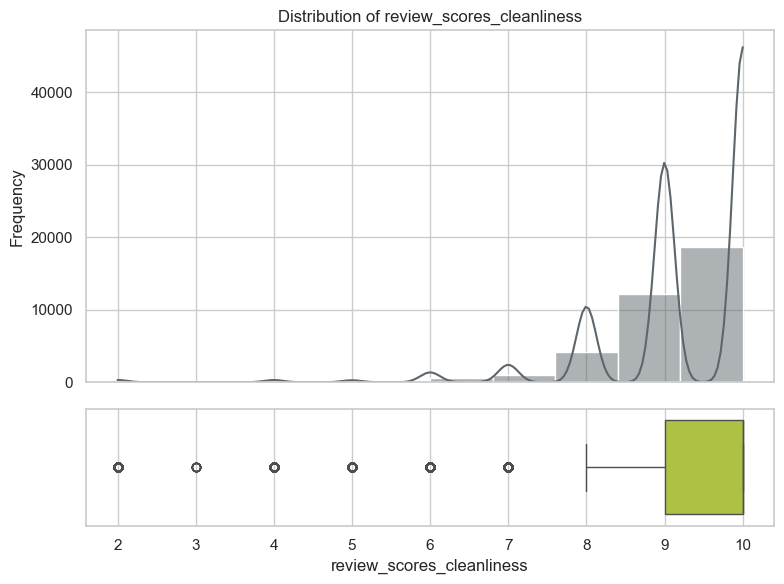

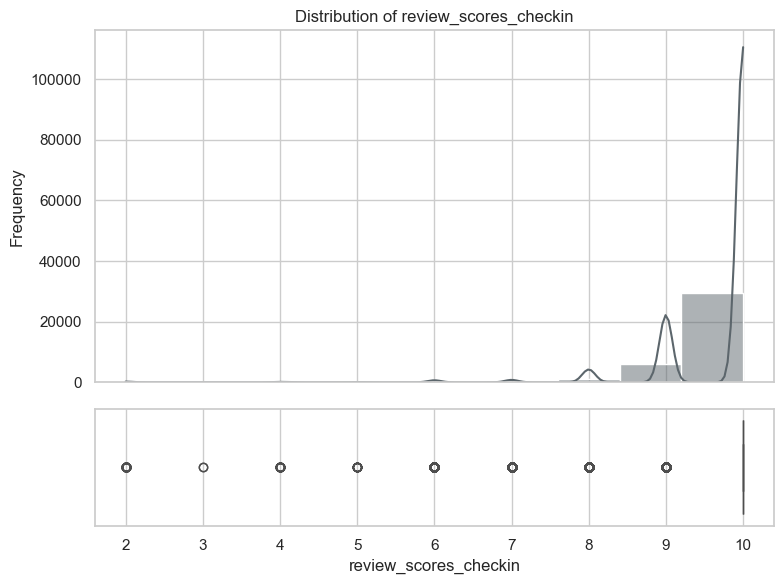

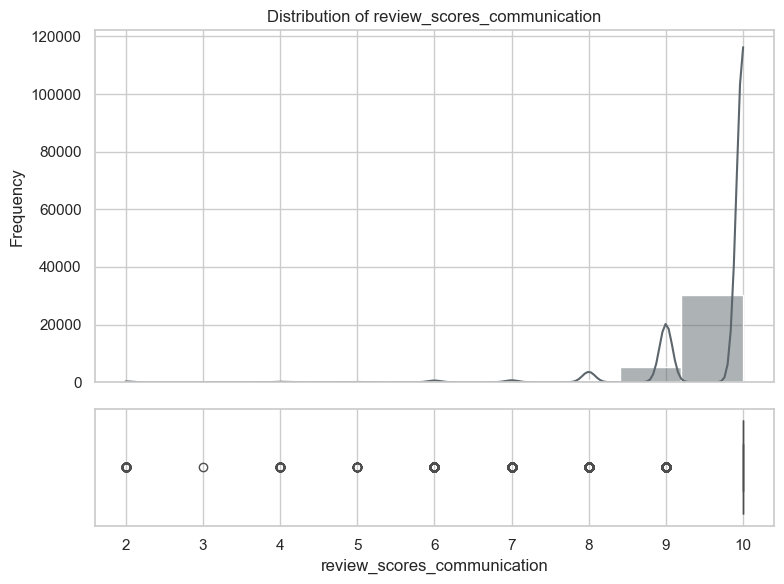

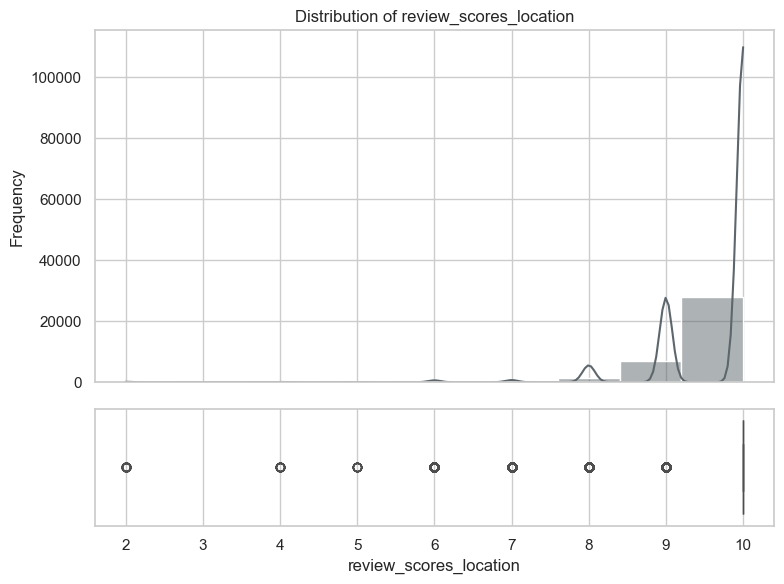

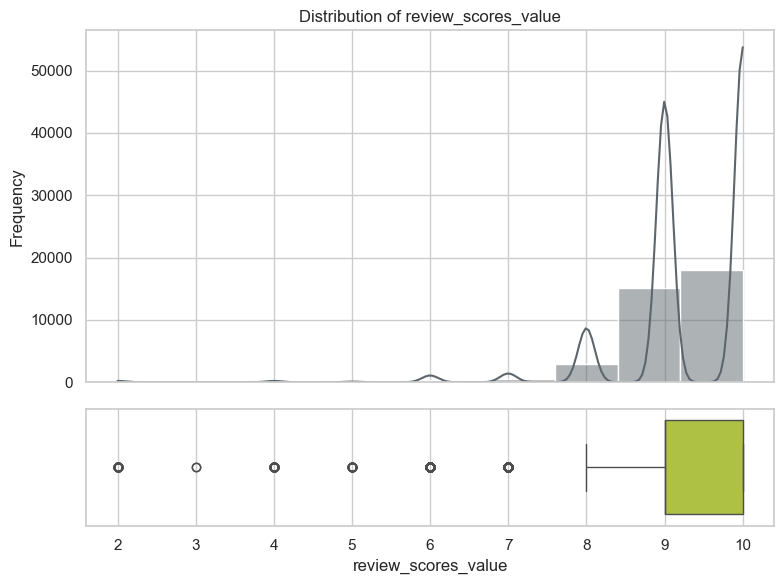

In [549]:
plot_dist_and_box(listings, review_cols, bins = 10)

Conclusions

- Most Listings Receive Very High Ratings:

  The majority of `review_scores_rating` values fall between 90 and 100, indicating consistently high guest satisfaction across the platform.

- Distribution Is Right-Skewed:

  The histogram and KDE curve show a strong concentration at the high end, with very few listings receiving low scores.

- Presence of Low-Score Outliers:

  The boxplot reveals a number of outliers with ratings below 80, suggesting occasional poor experiences, but these are relatively uncommon.

- Review System Favors Positive Ratings:

  The compressed distribution in the upper range may reflect social or platform bias toward leaving positive feedback.

- High Scores Are a Key Platform Strength:

  The tight cluster of high scores reinforces Airbnb’s perception as a guest-focused platform with generally reliable host quality.

The distributions of individual review scores are highly skewed and redundant, so we will keep only `review_scores_rating`, which encapsulates all other review metrics. Any missing values in this column will be imputed with the median during preprocessing.

In [550]:
cols_to_drop.append('review_scores_accuracy')
cols_to_drop.append('review_scores_cleanliness')
cols_to_drop.append('review_scores_checkin')
cols_to_drop.append('review_scores_communication')
cols_to_drop.append('review_scores_location')
cols_to_drop.append('review_scores_value')

# 7. Boolean Features

Conclusions

- Majority of Hosts Are Not Superhosts:

  The vast majority of hosts do not hold Superhost status. This suggests that becoming a Superhost is relatively rare.

- Superhost Status is Selective:

  The relatively small number of Superhosts indicates that Airbnb maintains strict criteria for achieving this recognition, emphasizing consistent high-quality hosting.


- Opportunity for Differentiation:

  Hosts can leverage Superhost status as a competitive advantage, signaling reliability and excellence to potential guests.

- Platform Standards Enforcement:

  The data may also reflect Airbnb’s efforts to uphold hosting standards by rewarding only top-performing hosts with the Superhost label.

- Most Hosts Have Profile Pictures:

  The vast majority of hosts have uploaded a profile picture, which helps build trust and improves transparency on the platform.

- Identity Verification Is Widespread:

  Most hosts have verified their identity, indicating strong adherence to Airbnb’s safety and trust standards.

- Platform Encourages Trust Signals:

  These high adoption rates suggest that Airbnb either requires or strongly incentivizes hosts to complete profile and identity verification steps.

- Guest Confidence Likely Increased:

  With most hosts being both verified and visually identifiable, guests are more likely to feel secure when booking.

- Low Incidence of Unverified Profiles:

  Only a small number of hosts lack a profile picture or verification, which may reflect inactive, new, or legacy accounts.

- Most Listings Do Not Support Instant Booking:

  The majority of listings have `instant_bookable` set to false, indicating that hosts prefer to manually approve booking requests.

- Instant Booking Is Common but Not Dominant:

  A significant number of listings do support instant booking, showing that the feature is well-adopted but not yet standard across the platform.

- Host Control May Still Be a Priority:

  The prevalence of manual booking suggests many hosts value the ability to screen guests or control their calendar more tightly.

- Guest Convenience May Be Impacted:

  For guests seeking quick confirmation, the lower share of instant-bookable listings may introduce friction or delay in the booking process.

- Potential Growth Area for Airbnb:

  Encouraging more hosts to enable instant booking could streamline the platform experience and improve conversion rates.

# 8. Categorical Features

## 8.1 Name

Extracting meaningful insights from this feature would require an NLP model, which is beyond the scope of this project. Therefore, we will drop this feature.

In [551]:
cols_to_drop.append('name')

## 8.2 Host Location 

In [552]:
# Assuming df is your DataFrame
distinct_locations = listings['host_location'].dropna().unique()
print(f"Distinct host_location values count: {len(distinct_locations)}")

# Display the distinct values (not truncated)
for location in distinct_locations:
    print(location)

Distinct host_location values count: 1
Paris, Ile-de-France, France


The `host_location` feature offers limited predictive value since hosts can be anywhere in the world. We will drop this column.

In [553]:
cols_to_drop.append('host_location')

## 8.3 City 

Because we filtered to include only listings in Paris, the `city` feature is now constant. We will drop this feature.

In [554]:
cols_to_drop.append('city')

## 8.4 District 

In [555]:
inspect_missing(listings, 'district')

district: 47,468 missing out of 47,468 → 100.00% missing

Showing 10 random rows where `district` is null:


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
20122,43675393,750 sqft bright Parisian apartment - St Lazare,6693855,2013-06-02,"Paris, Ile-de-France, France",within an hour,1.00,0.97,False,37.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
9528,31016926,Charmant F1 (rez de chaussee) proche Tour Eiffel.,231648783,2018-12-20,"Paris, Ile-de-France, France",NaN,NaN,1.00,False,1.0,...,3,1125,84.0,10.0,8.0,10.0,9.0,10.0,9.0,False
33338,16309283,Comfortable apartment close to Notre Dame,17833119,2014-07-08,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,2.0,...,14,1124,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False
45997,26403250,Agreable studio au coeur du 11e !,35757935,2015-06-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,10,93.0,8.0,9.0,9.0,10.0,10.0,10.0,False
31394,7521498,"Splendide 100 m2 , 3 piÃÂÃÂÃÂÃÂ¨ces ,M...",39414292,2015-07-24,"Paris, Ile-de-France, France",within a day,0.50,0.50,False,2.0,...,5,90,88.0,10.0,8.0,9.0,10.0,10.0,9.0,False
42465,20415094,Studio ÃÂÃÂÃÂÃÂ Belleville,21363585,2014-09-15,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,3,22,93.0,10.0,9.0,10.0,10.0,9.0,9.0,True
2159,7781973,"51 m2 en plein paris, parc Monceau",40946268,2015-08-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,5,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
26478,9790574,Cozy appartement - ÃÂÃÂÃÂÃÂ cÃÂÃÂÃ...,4650746,2013-01-10,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
15724,1318680,Beautiful apartment like a house,7161857,2013-06-28,"Paris, Ile-de-France, France",within a day,0.75,0.20,False,1.0,...,1,1125,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False
16579,42396464,ÃÂÃÂ°ÃÂ ÃÂ¸ÃÂ ÃÂ½ÃÂ¢ÃÂÃÂ Studio Br...,6053288,2013-04-23,"Paris, Ile-de-France, France",a few days or more,0.20,0.97,False,246.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


Due to the high number of missing value we decided to drop this feature. 

In [556]:
cols_to_drop.append('district')

## 8.5. Host Responses Time

In [557]:
inspect_missing(listings, 'host_response_time')

host_response_time: 30,941 missing out of 47,468 → 65.18% missing

Showing 10 random rows where `host_response_time` is null:


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
27698,29794689,Chambre dans maison paris typique,48618436,2015-11-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,2.0,...,2,15,93.0,10.0,9.0,10.0,10.0,10.0,9.0,False
6058,17262603,Studio calme et chaleureux dans le marais,1090542,2011-08-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,4,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
46777,3173261,Ideal home for a couple in Paris !,16060984,2014-05-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,3,75,97.0,10.0,9.0,10.0,10.0,10.0,10.0,False
40091,16729935,EIFFEL TOWER & SEINE - Gorgeous family flat,60453131,2016-02-26,"Paris, Ile-de-France, France",NaN,NaN,1.00,True,1.0,...,3,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False
4671,5387603,Soleil et calme ÃÂÃÂÃÂÃÂ Montmartre,27929714,2015-02-18,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,3,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
41191,17563494,Appartement sympa dans le 11ÃÂÃÂÃÂÃÂ¨me,119228523,2017-03-05,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,1,5,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True
10637,35437531,Splendid apartment close to the Monceau park ...,266679410,2019-06-06,"Paris, Ile-de-France, France",NaN,NaN,1.00,False,1.0,...,1,1125,91.0,10.0,9.0,9.0,10.0,10.0,9.0,False
42548,12616629,Calme Studio proche Montsouris,19705381,2014-08-08,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,5,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6926,13581870,"In the heart of Paris,quiet and sunny studio, ...",78395030,2016-06-18,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
23492,32855919,Jolie Chambre Femmes seulement / Women only ;),247180247,2019-03-06,"Paris, Ile-de-France, France",NaN,NaN,0.91,False,2.0,...,2,1125,99.0,10.0,10.0,10.0,10.0,10.0,10.0,False


Conclusions

- Most Hosts Respond Within an Hour:

  The largest group of hosts reply to guest inquiries within an hour, demonstrating a high level of attentiveness and responsiveness on the platform.

- Fast Response is a Common Standard:

  The second and third bars represent hosts responding within a few hours or a day, showing that a majority of hosts aim to maintain good communication practices.

- Slow Responders Are a Minority:

  Only a small fraction of hosts respond after a few days or more, indicating that long response times are uncommon and may be discouraged by the platform.

- Platform Likely Encourages Quick Replies:

  The dominance of fast response categories suggests Airbnb likely rewards or promotes hosts who maintain strong communication, possibly influencing booking rates.

Due to the high number of missing value and not much difference when compared with target variable we decided to drop this feature. 

In [558]:
cols_to_drop.append('host_response_time')

## 8.6 Property Type

In [559]:
# Get unique (non‑null) property types as a NumPy array
unique_property_types = listings['property_type'].dropna().unique()

print("Unique property_type values:")
for pt in unique_property_types:
    print(f"  - {pt}")

Unique property_type values:
  - Entire apartment
  - Entire loft
  - Entire house
  - Entire condominium
  - Private room in apartment
  - Private room in condominium
  - Entire guest suite
  - Earth house
  - Entire townhouse
  - Room in serviced apartment
  - Private room in bed and breakfast
  - Entire serviced apartment
  - Private room in house
  - Tiny house
  - Private room in guest suite
  - Entire villa
  - Private room in loft
  - Room in boutique hotel
  - Entire place
  - Entire floor
  - Entire guesthouse
  - Houseboat
  - Entire cottage
  - Boat
  - Private room in guesthouse
  - Entire home/apt
  - Room in hotel
  - Room in bed and breakfast
  - Room in aparthotel
  - Private room in villa
  - Shared room in apartment
  - Private room in townhouse
  - Private room in chalet
  - Entire bed and breakfast
  - Cave
  - Shared room in condominium
  - Private room in boat
  - Shared room in serviced apartment
  - Shared room in hostel
  - Entire bungalow
  - Private room
  - 

Due to the high number classes, and similarity among them we will group them in fewer classes in the feature engineering section.

## 8.7 Room Type 

Conclusions

- The majority of listings are for "Entire place" accommodations, which make up the vast majority (over 54,000 listings). This suggests a strong preference or availability for full-property rentals on the platform.

- "Private room" listings are the second most common, followed by a much smaller number of "Hotel room" and "Shared room" listings.

- In terms of price:
  - "Hotel room" listings have the **highest median price**, with a wide price spread and many high-end outliers.
  - "Entire place" listings also tend to have **relatively high prices**, but with a tighter distribution compared to hotel rooms.
  - "Private room" and "Shared room" listings are generally **more affordable**, with lower medians and less variation in price.

- Outliers are present across all categories, especially among "Entire place" and "Hotel room" listings, which may reflect luxury or premium accommodations.

- This distribution suggests that while most users list entire properties, there is still a market for lower-cost alternatives like private or shared rooms.

## 8.8 Neighbourhood

Conclusions

- The most frequently listed neighbourhoods are **Buttes-Montmartre**, **Popincourt**, and **Vaugirard**, each with thousands of listings. These areas likely attract a high volume of tourists or have a dense concentration of rental properties.

- On the other end, **Louvre**, **Elysee**, and **Palais-Bourbon** have the fewest listings, suggesting limited availability or more exclusive rental markets.

- In terms of price distribution:
  - Neighbourhoods like **Louvre**, **Elysee**, and **Palais-Bourbon** have **higher median prices and more expensive outliers**, which may reflect their central location, prestige, or luxury offerings.
  - Areas with higher listing counts (e.g., **Buttes-Montmartre**, **Popincourt**) tend to have **lower median prices**, possibly due to a wider range of property types and more competitive pricing.

- There is a wide range of price variability within almost every neighbourhood, shown by the large number of outliers. This suggests a mix of budget and premium listings in most areas.

- These patterns can inform location-based pricing strategies and indicate which neighbourhoods offer more affordable versus upscale rental options.

## 8.9 Amenities

In [560]:
display(listings[['amenities']].head(10))

,amenities
0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long..."
1,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""..."
2,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",..."
3,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter..."
4,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha..."
5,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Wa..."
6,"[""Shampoo"", ""TV"", ""Kitchen"", ""Washer"", ""Smoke ..."
7,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Wa..."
8,"[""Paid parking off premises"", ""Shampoo"", ""Heat..."
9,"[""Heating"", ""TV"", ""Iron"", ""Kitchen"", ""Essentia..."


This feature is going to be engineered to get extract more meaningful informations

# 9. Feature Engineering

## 9.1 Host Years/Days Active 

In [561]:
# --- 2. Calculate the most‑recent host_since date (max_date) ---
max_date = listings['host_since'].max()

# --- 3. Add the two new columns ---
# Days active
listings['host_days_active'] = (max_date - listings['host_since']).dt.days

# Integer years active (simple 365‑day year, like the Spark cast("int"))
listings['host_years_active'] = (listings['host_days_active'] // 365).astype(int)

# --- 4. Display the relevant columns (first 10 rows for brevity) ---
display(listings[['host_since', 'host_days_active', 'host_years_active']].head(10))

,host_since,host_days_active,host_years_active
0,2011-12-03,3350,9
1,2013-11-29,2623,7
2,2014-07-31,2379,6
3,2013-12-17,2605,7
4,2014-12-14,2243,6
5,2011-04-13,3584,9
6,2013-08-09,2735,7
7,2013-04-14,2852,7
8,2015-06-14,2061,5
9,2014-09-02,2346,6


C:\Users\Fábio Dos Santos\AppData\Local\Temp\ipykernel_7680\4163408304.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Fábio Dos Santos\AppData\Local\Temp\ipykernel_7680\4163408304.py:17: UserWarning: The palette list has more values (20) than needed (13), which may not be intended.
  sns.barplot(


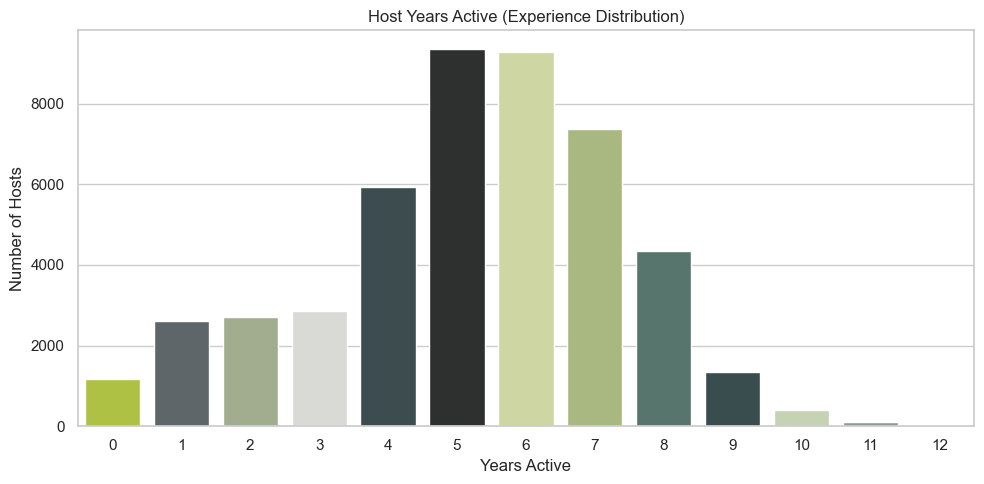

In [562]:
# --- 1. Keep only valid rows (non‑null & non‑negative years) ---
df_view = listings.loc[
    (listings['host_years_active'] >= 0) & listings['host_years_active'].notna()
]

# --- 2. Get counts per years_active, sorted ascending ---
years_active = (
    df_view
    .groupby('host_years_active', as_index=False)
    .size()                              # counts into a column called 'size'
    .rename(columns={'size': 'count'})   # rename for clarity
    .sort_values('host_years_active')
)

# --- 3. Plot with Seaborn (or Matplotlib) ---
plt.figure(figsize=(10, 5))
sns.barplot(
    data=years_active,
    x='host_years_active',
    y='count',
    palette=main_palette          # use the palette you already defined
)
plt.title('Host Years Active (Experience Distribution)')
plt.xlabel('Years Active')
plt.ylabel('Number of Hosts')
plt.tight_layout()
plt.show()

Conclusions

- Most Hosts Have Moderate Experience:

  The peak of the distribution lies around 4–6 years of activity, indicating that a large portion of hosts have been on the platform for a sustained but not extreme amount of time.

- New Hosts Are Less Common:

  The number of hosts with only 0–1 year of experience is relatively low, which may reflect barriers to entry, or that the dataset skews toward more established hosts.

- Long-Time Hosts Are a Minority:

  There are fewer hosts with more than 8 years on the platform, suggesting that long-term retention is relatively rare or that Airbnb's major growth came in more recent years.

- Airbnb Has a Mature Host Base:

  The concentration in the middle years indicates a stable core of hosts who are not new but also not among the earliest adopters.

- Platform Evolution Reflected in Host Tenure:

  This distribution may mirror Airbnb’s major growth period, where many hosts joined around the same time and have since remained active.

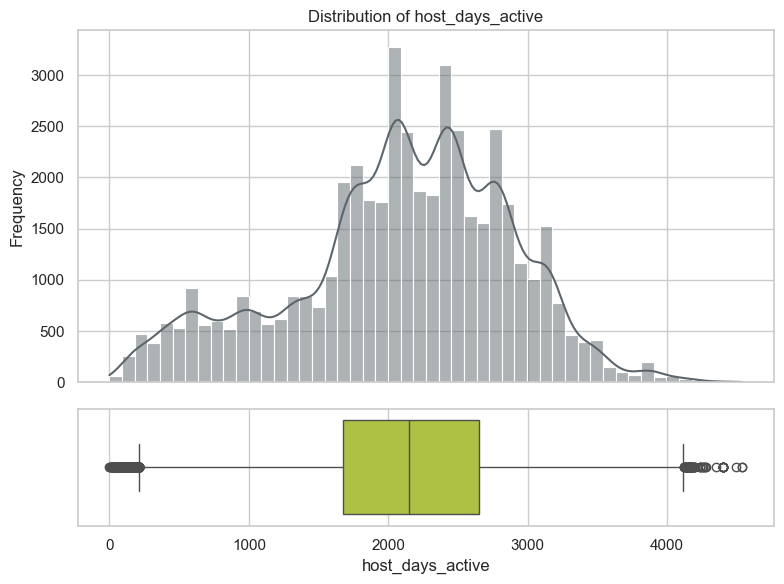

In [563]:
plot_dist_and_box(listings, "host_days_active", bins = 50)

Conclusions

- The distribution of `host_days_active` is roughly symmetrical and **centered around 2000 days**, indicating that many hosts have been active for around 5–6 years.

- There is a **broad spread** of host activity, with a notable density between 1000 and 3000 days, suggesting a stable base of long-term hosts on the platform.

- A few **outliers exist beyond 4000 days**, possibly indicating early adopters or data inconsistencies (since that’s over 10 years).

- The distribution suggests a **mature host population**, with relatively few very new or extremely old accounts.

- The long right tail and minor clustering may reflect growth phases of the platform or varying host entry times.

In [564]:
numerical_features.append('host_days_active')
numerical_features.append('host_years_active')

## 9.2 Property Type New Groups

- Next we group these property types in categories. These categories will be "entire_place", "private_room", "shared_room", "unique_stays" and "hotel_boutique".<br>

| Category                       | Description |
|------------------------------|-------------|
| `entire_place`                 | Includes all listings that are an entire place and not just a room. |
| `private_room`                       | Includes all listings that are a unique private room. |
| `shared_room`                    | Includes all listings that are a shared room. |
| `unique_stays`                 | Includes out of the box listings (for example: cave, RV, etc) |
| `hotel`              | Includes listings that are hotels.  |

- Special attention to a property type that is written in portuguese. "Casa particular" which means Private House and will be included in the "entire_place".

In [565]:
def categorize_property_type_column(
    df: pd.DataFrame,
    col: str = "property_type",
    groups: dict | None = None,
    default: str = "Other",
    inplace: bool = True
) -> pd.DataFrame:
    """
    Replace raw property_type values with their group/category names.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the property type column.
    col : str, default "property_type"
        Name of the column to categorize.
    groups : dict, optional
        Dictionary mapping group names to lists of raw property types.
        Uses default Airbnb groups if None.
    default : str, default "Other"
        Category name assigned to unknown property types.
    inplace : bool, default True
        If True, modify df in place and return it.
        Otherwise, return a new DataFrame with modified column.

    Returns
    -------
    pd.DataFrame
        DataFrame with the property_type column replaced by group labels.
    """

    if groups is None:
        groups = {
            "entire_place": [
                "Entire apartment", "Entire house", "Entire guesthouse",
                "Entire guest suite", "Entire place", "Entire bed and breakfast",
                "Entire townhouse", "Entire villa", "Entire home/apt",
                "Entire serviced apartment", "Entire condominium",
                "Entire loft", "Entire cottage", "Entire bungalow",
                "Entire floor", "Entire chalet", "Casa particular"
            ],
            "private_room": [
                "Private room in loft", "Private room in boat",
                "Private room in condominium", "Private room in chalet",
                "Private room in guest suite", "Private room in bed and breakfast",
                "Private room in cabin", "Private room in serviced apartment",
                "Private room in apartment", "Private room",
                "Private room in house", "Private room in villa",
                "Private room in guesthouse", "Private room in townhouse",
                "Private room in earth house", "Private room in hostel",
                "Private room in casa particular", "Private room in nature lodge",
                "Private room in houseboat", "Room in serviced apartment",
                "Room in bed and breakfast"
            ],
            "shared_room": [
                "Shared room in hostel", "Shared room in condominium",
                "Shared room in serviced apartment", "Shared room in apartment",
                "Shared room in cabin", "Shared room in loft",
                "Shared room in bed and breakfast", "Shared room in tiny house",
                "Shared room in house", "Shared room in igloo",
                "Shared room in guest suite", "Shared room in guesthouse",
                "Shared room in townhouse", "Shared room in boutique hotel"
            ],
            "unique_stays": [
                "Cave", "Tiny house", "Boat", "Earth house", "Campsite",
                "Houseboat", "Dome house", "Camper/RV", "Treehouse",
                "Island", "Barn"
            ],
            "hotel": [
                "Room in boutique hotel", "Room in aparthotel",
                "Room in hotel", "Room in hostel"
            ]
        }

 # Normalize group keys
    lookup = {raw.lower(): grp for grp, raw_list in groups.items() for raw in raw_list}

    # Normalize dataframe column
    normalized = df[col].astype(str).str.lower().str.strip()

    new_col = normalized.map(lookup).fillna(default)

    if inplace:
        df[col] = new_col
        return df
    else:
        return df.assign(**{col: new_col})

Conclusions

- The vast majority of listings are for `entire_place` properties, accounting for over 54,000 entries. This indicates that most hosts offer full-property rentals.

- `private_room` is the second most common type, followed by smaller counts for `hotel`, `shared_room`, and very few `unique_stays`.

- In terms of price distribution:
  - `hotel` listings tend to have the **highest median prices** and a wide range, suggesting they target higher-end or centrally located travelers.
  - `entire_place` properties have relatively high prices but are more consistently distributed.
  - `shared_room` and `private_room` are the **most affordable** options, with lower medians and tighter price ranges.
  - `unique_stays` show high variability, with some listings priced very high, possibly due to niche or luxury offerings.

- Outliers are frequent across all categories, particularly in `hotel`, `entire_place`, and `unique_stays`, which may reflect luxury listings or inflated prices in certain areas.

- This distribution illustrates a diverse market with dominant full-property rentals and distinct pricing tiers across property types.

In [566]:
listings = categorize_property_type_column(listings)

- We went from 66 different property types to 5. <br>
- In general hotel listings are more expensive, these makes sense due to extra services like housekeeping, breakfast, frontdesk services 24/7, gym, etc etc. <br>
- The majority of the listings (84%) are entire place listings. This indicates there is a strong market for renting entire properties in Paris. <br>
- As expected the least common property type is unique type (0.09%) 

In [567]:
print(listings['property_type'].unique())


['entire_place' 'private_room' 'unique_stays' 'hotel' 'shared_room']


## 9.3 Amenities Length

In [568]:
import json                # ←‑‑‑ add this
import pandas as pd

def parse_amenities(s):
    if pd.isna(s):
        return []

    # 1) try strict JSON first
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        # 2) fall back to common Airbnb quirks
        #    e.g. "{Wifi,\"TV\"}"  or  "['Wifi','TV']"
        s_fixed = (
            s.replace("'", '"')        # single → double quotes
             .strip("{}")              # drop outer curly braces
        )
        try:
            return json.loads(f'[{s_fixed}]')
        except Exception:
            return []

# ------------------------------------------------------------------
# Create the new columns
# ------------------------------------------------------------------
listings['amenities_array']  = listings['amenities'].apply(parse_amenities)
listings['amenities_length'] = listings['amenities_array'].str.len()

# Quick sanity check
display(listings[['amenities', 'amenities_array', 'amenities_length']].head())

,amenities,amenities_array,amenities_length
0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...","[Heating, Kitchen, Washer, Wifi, Long term sta...",5
1,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...","[Shampoo, Heating, Kitchen, Essentials, Washer...",8
2,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...","[Heating, TV, Kitchen, Washer, Wifi, Long term...",6
3,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...","[Heating, TV, Kitchen, Wifi, Long term stays a...",5
4,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...","[Heating, TV, Kitchen, Essentials, Hair dryer,...",12


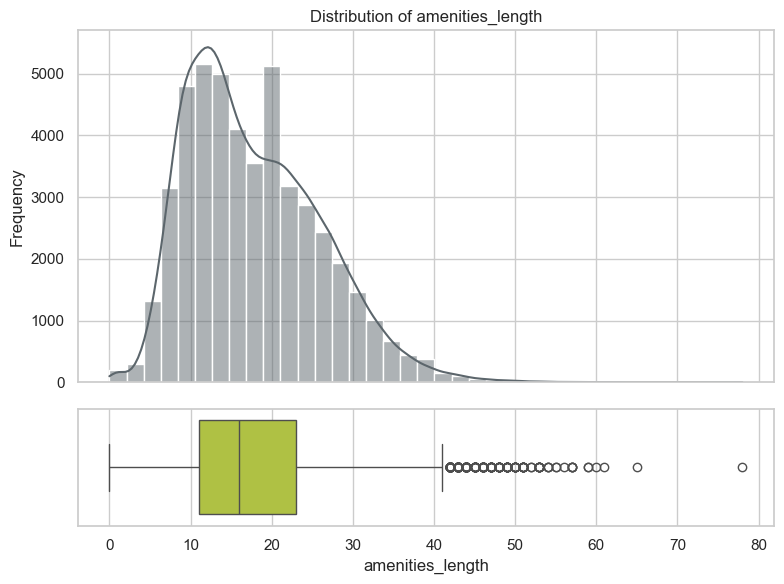

In [569]:
plot_dist_and_box(listings, 'amenities_length', bins = 37)

Conclusions

- Most Listings Offer 10 to 25 Amenities:

  The distribution peaks between 10 and 25 amenities, indicating that this is the typical range of offerings for Airbnb listings.

- Very Sparse Listings Are Uncommon:

  Only a small number of listings provide fewer than 5 amenities, suggesting that even basic listings include several comfort or convenience features.

- Long Tail Toward High-Amenity Listings:

  A minority of listings offer 40 or more amenities, possibly indicating luxury units, full-service apartments, or professional hosts.

- Amenity Count Reflects Competitive Hosting:

  The spread of amenities suggests hosts aim to enhance their listings with as many features as possible to stay competitive and increase guest satisfaction.

- Opportunity for Listing Differentiation:

  Hosts with lower amenity counts may benefit from improving their offering, as most listings fall within a mid-to-high amenity range.

In [570]:
numerical_features.append('amenities_length')

## 9.4 Amenities Engineering

In [571]:
# 1) “Explode” the list column so each amenity gets its own row
exploded = listings['amenities_array'].explode()   # or df['amenities_array']

# 2) Grab the distinct amenities and their count
unique_amenities = exploded.dropna().unique()      # NumPy array of unique values
count = len(unique_amenities)

print(f"Total number of amenities: {count}")

Total number of amenities: 634


- There are 618 different amenities.
- Having a quick look we can see that there are different words or group of words to say the same (for example: 'De Dietrich stainless steel oven', 'MIELE oven' that are referring to just oven)

#### Airbnb Amenities Processing Pipeline

1. **Standardize amenities using a controlled keyword list**

   * Replace verbose or branded terms (e.g., `"de dietrich stainless steel oven"`)
   * Keep only simplified, meaningful keywords (e.g., `"oven"`)
   * Filter out non-relevant or redundant tokens

2. **Normalize the `amenities` column**

   * Convert all text to lowercase
   * Remove special characters, punctuation, and extra spaces
   * Ensure consistent formatting across listings

3. **Group standardized keywords into amenity categories**

   * Create a dictionary mapping categories (e.g., `"kitchen"`, `"safety"`, `"baby-friendly"`)
   * Each category contains a curated list of associated amenities

4. **Enrich the DataFrame with category-based feature columns**

   * For each listing, calculate the proportion of amenities it has in each category:
     `(# matched amenities in category) / (total amenities in category)`
   * Add one column per category with these proportions

In [572]:
import pandas as pd
import json
import re
from typing import List, Iterable, Any


# --------------------------------------------------------------------
# Default keywords (normalized and deduplicated)
# --------------------------------------------------------------------
RAW_KEYWORDS = [
    "kettle", "dedicated workspace table", "indoor fireplace", "coffee machine",
    "first aid kit", "stove", "washerin unit", "kitchen", "single level home",
    "sound system", "clothing storage", "refrigerator", "garden", "oven", "hdtv",
    "netflix", "smoking allowed", "tv", "body soap", "outdoor furniture", "crib",
    "coffee", "movie projector", "babysitter recommendations", "host greets you",
    "baby safety gates", "pool table", "air conditioning", "parking", "outlet covers",
    "heating", "window guards", "waterfront", "lake access", "bedroom comforts",
    "shampoo", "washer", "fireplace guards", "baby monitor", "conditioner", "ac unit",
    "extra pillows and blankets", "childrens dinnerware", "hot water", "iron", "dryer",
    "childrens books and toys", "wifi", "game console", "barbecue", "shower gel",
    "breakfast", "baking sheet", "cleaning before checkout", "patio", "balcony", "pool",
    "self checkin", "lockbox", "sauna", "keypad", "hangers", "drying rack for clothing",
    "fans", "wine glasses", "private entrance", "dryerin", "bathtub",
    "dishes and silverware", "microwave", "outdoor shower", "heater", "high chair",
    "safe", "beachfront", "smoke alarm", "pets allowed", "fan", "ethernet", "dining table",
    "dedicated workspace", "elevator", "laundromat", "gym", "table corner guards",
    "toaster", "cleaning products", "hot tub", "nespresso machine", "ev charger",
    "smart lock", "record player", "fridge", "outdoor dining area", "rice maker",
    "essentials", "luggage dropoff allowed", "carbon monoxide alarm",
    "long term stays allowed", "bathroom essentials", "dishwasher", "freezer", "bidet",
    "skiinskiout", "building staff", "washer in", "roomdarkening shades", "mosquito net",
    "fire extinguisher", "beach essentials", "garden or backyard", "changing table",
    "cooking basics", "piano", "bed linens", "bbq grill", "baby bath", "bread maker",
    "electric blinds", "rain shower", "bikes", "wine cellar", "gated pproperty",
    "wine cooler", "ice machine", "board games", "suitable for events",
    "decorative fireplace", "trash compactor", "espresso machine", "dual vanity",
    "wet bar", "private living room", "library", "massage bed", "office", "music system",
    "dvd player", "outdoor seating", "internet", "gated community", "video games",
    "sun loungers", "spa", "ipod dock", "game room", "steam room", "projector",
    "dining area", "books", "ironing board", "lounge area", "blender", "restaurant",
    "gas grill", "smoking parlor", "terrace", "woodburning fireplace", "bluray player",
    "lock on bedroom door", "ping pong table", "garage", "ipad", "room service",
    "housekeeping", "toiletries", "bathrobes", "bed sheets and pillows", "selfparking",
    "alarm system", "airport shuttle", "fitness center", "minibar", "bar",
    "laundry services", "courtyard", "concierge", "slippers", "hammam",
    "bluetooth speaker", "printer", "turndown service", "bottled water", "linens",
    "desk", "kitchenette", "security cameras"
]

DEFAULT_KEYWORDS = sorted({
    re.sub(r"[^a-zA-Z\s]", "", kw.lower()).strip()
    for kw in RAW_KEYWORDS
})


# --------------------------------------------------------------------
# Utility function: parses amenity strings safely
# --------------------------------------------------------------------
def _parse_amenities(raw: Any) -> List[str]:
    """Converts a raw amenities value into a list of strings."""
    if pd.isna(raw):
        return []

    if isinstance(raw, (list, tuple)):
        return list(raw)

    try:
        parsed = json.loads(raw)
        if isinstance(parsed, list):
            return parsed
    except Exception:
        pass

    try:
        fixed = raw.replace("'", '"').strip("{}")
        return json.loads(f"[{fixed}]")
    except Exception:
        return []


# --------------------------------------------------------------------
# Main function: maps DataFrame amenities to standardized keywords
# --------------------------------------------------------------------
def add_standardized_amenities(
    df: pd.DataFrame,
    amenity_col: str = "amenities",
    output_col: str = "standardized_amenities",
    keywords: Iterable[str] | None = None,
    inplace: bool = True,
    verbose: bool = False,
) -> pd.DataFrame:
    """
    Maps amenity descriptions in a DataFrame to a list of standardized keywords.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame containing the amenities column.
    amenity_col : str
        Name of the column with amenity data (JSON string or list).
    output_col : str
        Name of the column to store standardized results.
    keywords : Iterable[str], optional
        A list of target keywords to match against. Defaults to DEFAULT_KEYWORDS.
    inplace : bool
        If True, modifies the original DataFrame. If False, returns a new one.
    verbose : bool
        If True, prints sample mappings and parsing errors.

    Returns
    -------
    pd.DataFrame
        DataFrame with the new `output_col` added.
    """
    keyword_set = {
        re.sub(r"[^a-zA-Z\s]", "", kw.lower()).strip()
        for kw in (keywords or DEFAULT_KEYWORDS)
    }

    def _match_keywords(amenities: List[str]) -> List[str]:
        matches = set()
        for amenity in amenities:
            norm = re.sub(r"[^a-zA-Z\s]", "", amenity.lower()).strip()
            for kw in keyword_set:
                if kw in norm:
                    matches.add(kw)
                    break
        return sorted(matches)

    try:
        parsed = df[amenity_col].apply(_parse_amenities)
        standardized = parsed.apply(_match_keywords)
        if inplace:
            df[output_col] = standardized
            return df
        else:
            return df.assign(**{output_col: standardized})
    except Exception as e:
        if verbose:
            print(f"Error during standardization: {e}")
        raise


In [573]:
unique_amenities = listings['amenities_array'].explode().unique()


In [574]:
# Explode the lists into individual rows
unique_amenities = listings['amenities_array'].explode().dropna().unique()

# Sort and display them
for amenity in sorted(unique_amenities):
    print(amenity)

# Optional: Count them
print(f"\nTotal unique amenities: {len(unique_amenities)}")


 linens
 toiletries
100" HDTV with Netflix
103" TV with Netflix
2 fours: Micro-onde et chaleur tournante stainless steel oven
2 réfrigérateur encastrés refrigerator
23" HDTV with premium cable
23" TV with Netflix
24" HDTV
31" HDTV with Netflix, standard cable
32" HDTV
32" HDTV with Amazon Prime Video, Netflix
32" HDTV with Netflix, Amazon Prime Video, standard cable
40" HDTV
40" HDTV with Netflix, Chromecast
40" HDTV with standard cable
41" HDTV with standard cable
42" HDTV with Netflix, Amazon Prime Video, Chromecast
43" HDTV
43" HDTV with Netflix
45" HDTV with Netflix
48" HDTV with premium cable
55" HDTV with Amazon Prime Video, Chromecast, Netflix, premium cable, standard cable
55" HDTV with Netflix
55" HDTV with Netflix, Chromecast
55" HDTV with Netflix, Chromecast, premium cable
55" HDTV with premium cable
55" HDTV with premium cable, standard cable
56" HDTV with Amazon Prime Video, Apple TV, Netflix, premium cable
60" HDTV
65" HDTV with Apple TV, Netflix, premium cable
65" HDTV w

In [575]:
listings = add_standardized_amenities(listings)

In [576]:
listings

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,host_years_active,amenities_array,amenities_length,standardized_amenities
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,3350,9,"[Heating, Kitchen, Washer, Wifi, Long term sta...",5,"[heating, kitchen, long term stays allowed, wa..."
1,3705183,39 mÃÂÃÂÃÂÃÂ² Paris (Sacre CÃÂÃÂ ÃÂ...,10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,2623,7,"[Shampoo, Heating, Kitchen, Essentials, Washer...",8,"[dryer, essentials, heating, kitchen, long ter..."
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,2379,6,"[Heating, TV, Kitchen, Washer, Wifi, Long term...",6,"[heating, kitchen, long term stays allowed, tv..."
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,2605,7,"[Heating, TV, Kitchen, Wifi, Long term stays a...",5,"[heating, kitchen, long term stays allowed, tv..."
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,2243,6,"[Heating, TV, Kitchen, Essentials, Hair dryer,...",12,"[bathtub, dryer, elevator, essentials, heating..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47463,38338635,Appartement T2 neuf prÃÂÃÂÃÂÃÂ¨s du tra...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,2123,5,"[Iron, Heating, Washer, Dedicated workspace, E...",12,"[dedicated workspace, elevator, essentials, ha..."
47464,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,2625,7,"[Shampoo, Iron, Heating, Washer, Hair dryer, E...",12,"[dryer, elevator, essentials, hangers, heating..."
47465,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,3204,8,"[Paid parking off premises, Shampoo, First aid...",15,"[breakfast, dedicated workspace, dryer, essent..."
47466,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1.0,...,10.0,10.0,10.0,10.0,False,2029,5,"[TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...",15,"[carbon monoxide alarm, dedicated workspace, e..."


- Creation of a dictionary of amenity categories and correspondent amenities belonging to those categories.

In [577]:
amenity_categories = {
    "living_entertainment": [
        "tv", "hdtv", "netflix", "sound system", "movie projector", "record player",
        "dvd player", "bluray player", "ipod dock", "music system", "books",
        "board games", "game console", "video games", "ping pong table",
        "game room", "lounge area", "projector"
    ],
    "kitchen_dining": [
        "kitchen", "microwave", "oven", "stove", "toaster", "fridge", "refrigerator",
        "freezer", "rice maker", "bread maker", "nespresso machine", "coffee machine",
        "espresso machine", "kettle", "cooking basics", "dishes and silverware",
        "baking sheet", "blender", "dining table", "dining area", "wine glasses",
        "wine cooler", "wine cellar", "gas grill", "bbq grill", "barbecue", "dishwasher",
        "kitchenette", "ice machine"
    ],
    "bedroom": [
        "bed linens", "bedroom comforts", "bed sheets and pillows", "clothing storage",
        "extra pillows and blankets", "hangers", "ironing board", "iron",
        "roomdarkening shades", "linens", "alarm system"
    ],
    "bathroom": [
        "body soap", "shampoo", "conditioner", "shower gel", "bathtub", "bidet",
        "hot water", "bathroom essentials", "toiletries", "dual vanity", "rain shower",
        "bathrobes"
    ],
    "baby_family": [
        "crib", "high chair", "baby bath", "baby monitor", "baby safety gates",
        "childrens books and toys", "childrens dinnerware", "changing table",
        "table corner guards"
    ],
    "laundry_cleaning": [
        "washer", "washerin unit", "washer in", "dryer", "dryerin",
        "drying rack for clothing", "laundromat", "cleaning products",
        "cleaning before checkout", "laundry services"
    ],
    "safety_security": [
        "smoke alarm", "carbon monoxide alarm", "fire extinguisher",
        "fireplace guards", "outlet covers", "window guards", "mosquito net",
        "security cameras", "smart lock", "lockbox", "keypad",
        "lock on bedroom door", "alarm system"
    ],
    "outdoor_garden": [
        "patio", "balcony", "terrace", "garden", "garden or backyard",
        "outdoor furniture", "outdoor dining area", "outdoor seating",
        "outdoor shower", "sun loungers", "beachfront", "lake access",
        "beach essentials", "bikes", "gated community", "gated pproperty", "hammock"
    ],
    "heating_cooling": [
        "air conditioning", "ac unit", "fan", "fans", "heater", "heating",
        "indoor fireplace", "woodburning fireplace", "decorative fireplace"
    ],
    "travel_access": [
        "self checkin", "luggage dropoff allowed", "long term stays allowed",
        "private entrance", "suitable for events", "garage", "parking",
        "selfparking", "airport shuttle"
    ],
    "wellness_leisure": [
        "pool", "sauna", "hot tub", "hammam", "massage bed", "spa", "steam room"
    ],
    "workspace_tech": [
        "dedicated workspace", "dedicated workspace table", "desk", "office",
        "ethernet", "printer", "ipad", "internet", "wifi"
    ],
    "guest_services": [
        "host greets you", "room service", "housekeeping", "turndown service",
        "concierge", "minibar", "bar", "restaurant", "bottled water", "slippers",
        "building staff", "books", "library", "courtyard"
    ],
    "misc_essentials": [
        "essentials", "first aid kit", "pets allowed", "outlet covers"
    ]
}

- Enrich the DataFrame with category-based feature columns.

In [578]:
def add_amenity_category_counts(df, categories_dict, amenities_col='standardized_amenities'):
    """
    Add one column per category to df with counts of matching keywords in the amenities list.

    Parameters:
    - df: pd.DataFrame
    - categories_dict: dict[str, list[str]] — keys = category names, values = list of keywords
    - amenities_col: str — column name in df with list of standardized amenities

    Returns:
    - pd.DataFrame with added category count columns (modifies df in place)
    """

    def count_category_matches(amenities, keywords):
        if not amenities:
            return 0
        return sum(1 for k in keywords if k in amenities)

    for category, keywords in categories_dict.items():
        df[category] = df[amenities_col].apply(lambda a: count_category_matches(a, keywords))

    return df

In [579]:
listings = add_amenity_category_counts(listings, amenity_categories, amenities_col='standardized_amenities')


Dropping raw features

In [580]:
cols_to_drop.extend(['amenities', 'amenities_array', 'standardized_amenities'])

In [581]:
numerical_features.extend([
    "living_entertainment",
    "kitchen_dining",
    "bedroom",
    "bathroom",
    "baby_family",
    "laundry_cleaning",
    "safety_security",
    "outdoor_garden",
    "heating_cooling",
    "travel_access",
    "wellness_leisure",
    "guest_services",
    "misc_essentials"
])

numerical_features = [c for c in numerical_features if c not in cols_to_drop]
categorical_features = [c for c in categorical_features if c not in cols_to_drop]
boolean_features = [c for c in boolean_features if c not in cols_to_drop]

# DROPING COLUMNS 

In [ ]:
cols_to_drop=['listing_id',
 'host_id',
 'host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'latitude',
 'longitude',
 'maximum_nights',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'name',
 'host_location',
 'city',
 'district',
 'host_response_time',
 'amenities',
 'amenities_array',
 'standardized_amenities']

['listing_id',
 'host_id',
 'host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'latitude',
 'longitude',
 'maximum_nights',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'name',
 'host_location',
 'city',
 'district',
 'host_response_time',
 'amenities',
 'amenities_array',
 'standardized_amenities']

In [582]:
listings_cleaned = listings.drop(columns=cols_to_drop)

In [583]:
listings_cleaned

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bedrooms,price,...,baby_family,laundry_cleaning,safety_security,outdoor_garden,heating_cooling,travel_access,wellness_leisure,workspace_tech,guest_services,misc_essentials
0,False,1.0,True,False,Buttes-Montmartre,entire_place,Entire place,2.0,1.0,53,...,0,1,0,0,1,1,0,1,0,0
1,False,1.0,True,True,Buttes-Montmartre,entire_place,Entire place,2.0,1.0,120,...,0,2,0,0,1,1,0,1,0,1
2,False,1.0,True,False,Elysee,entire_place,Entire place,2.0,1.0,89,...,0,1,0,0,1,1,0,1,0,0
3,False,1.0,True,True,Vaugirard,entire_place,Entire place,2.0,1.0,58,...,0,0,0,0,1,1,0,1,0,0
4,False,1.0,True,False,Passy,entire_place,Entire place,2.0,1.0,60,...,0,2,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47463,False,1.0,True,True,Observatoire,entire_place,Entire place,2.0,1.0,120,...,0,1,1,0,1,0,0,2,0,1
47464,False,1.0,True,True,Buttes-Montmartre,entire_place,Entire place,2.0,1.0,60,...,0,2,0,0,1,0,0,1,0,1
47465,False,1.0,True,True,Buttes-Montmartre,entire_place,Entire place,2.0,1.0,50,...,0,2,0,0,1,2,0,2,1,2
47466,False,1.0,True,True,Popincourt,entire_place,Entire place,2.0,1.0,105,...,0,1,2,0,1,0,0,2,0,1


# PIPELINE TESTS - PARA APAGAR DEPOIS DOS PIPELINES ESTAREM BEM


In [12]:
# Basic logger configuration
logging.basicConfig(level=logging.INFO)


## 3.1. Data Cleaning


In [14]:
import pandas as pd
import logging

# 1. Change data types (booleans, dates, integers)
def change_data_types(df):
    bool_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].map({'t': True, 'f': False}).astype('boolean')
    df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
    df['bedrooms'] = df['bedrooms'].astype('Int64')
    return df

# 2. Remove irrelevant columns
def remove_irrelevant_columns(df):
    cols_to_drop = ['city', 'host_location', 'district', 'name']
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')
    return df


In [15]:
# Final combined data cleaning function
def data_cleaning_beforesplit(df, target_col='price'):
    logging.info("Starting data cleaning...")
    df = remove_irrelevant_columns(df)
    df = change_data_types(df)
    logging.info(f"Data cleaned, current shape: {df.shape}")
    return df

In [16]:
def handle_missing_values(X_train, X_val, y_train, y_val,
                             numerical_features, categorical_features, boolean_features):
    # Preenche missing numéricos com mediana do train
    for col in numerical_features:
        median_val = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_val)
        if col in X_val.columns:
            X_val[col] = X_val[col].fillna(median_val)

    # Preenche missing em booleanos e categóricos com moda do train
    for col in boolean_features + categorical_features:
        mode_val = X_train[col].mode(dropna=True)
        if not mode_val.empty:
            mode_val = mode_val[0]
            X_train[col] = X_train[col].fillna(mode_val)
            if col in X_val.columns:
                X_val[col] = X_val[col].fillna(mode_val)

    median_y = y_train.median() 
    if y_train.isnull().any():
        y_train = y_train.fillna(median_y)

    if y_val.isnull().any():
        y_val = y_val.fillna(median_y)
        
    return X_train, X_val, y_train, y_val



def handle_outliers(df, numerical_features = numerical_features, factor=1.5):
    for col in numerical_features:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df


In [17]:
def data_cleaning_aftersplit(X_train, X_val, y_train, y_val):
    numerical_features, categorical_features, boolean_features, _ = identify_data_types(X_train)

    logging.info("Starting data cleaning...")
    X_train, X_val, y_train, y_val = handle_missing_values(
        X_train, X_val, y_train, y_val,
        numerical_features, categorical_features, boolean_features
    )
    X_train = handle_outliers(X_train, numerical_features)

    return X_train, X_val, y_train, y_val


## 3.2. Feature Engineering

In [18]:
def get_top_amenities(df, top_n=3):
    # Extract all amenities from listings into one big list
    all_amenities = []
    for item in df['amenities'].dropna():
        try:
            amenities_list = ast.literal_eval(item)
            all_amenities.extend(amenities_list)
        except:
            continue

    # Count frequencies
    amenity_counts = Counter(all_amenities)
    top_overall = [amenity for amenity, count in amenity_counts.most_common(top_n)]

    return top_overall

def feature_engineering(df):
    logging.info("Creating features...")

    # Get top amenities lists
    top_overall = get_top_amenities(df)
    #logging.info(f"Top overall amenities: {top_overall}")

    # Create binary columns for top amenities dynamically
    def has_amenity(amenity_list, amenity):
        if pd.isnull(amenity_list):
            return False
        try:
            amenities = ast.literal_eval(amenity_list)
            return amenity in amenities
        except:
            return False

    created_features = []

    for amenity in top_overall:
        col_name = f'has_{amenity.lower().replace(" ", "_")}'
        df[col_name] = df['amenities'].apply(lambda x: has_amenity(x, amenity))
        created_features.append(col_name)

    # Count number of amenities
    df['n_amenities'] = df['amenities'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)
    created_features.append('n_amenities')

    # Convert 'host_since' to number of days since latest date
    if 'host_since' in df.columns:
        df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
        last_date = df['host_since'].max()
        df['host_since_days'] = (last_date - df['host_since']).dt.days
        df = df.drop(columns=['host_since'])
        created_features.append('host_since_days')


    # Create price per bedroom if possible
    if 'price' in df.columns and 'bedrooms' in df.columns:
        df['price_per_bedroom'] = df.apply(
            lambda row: row['price'] / row['bedrooms'] if pd.notna(row['bedrooms']) and row['bedrooms'] > 0 else np.nan,
            axis=1
        )

        created_features.append('price_per_bedroom')

    # Interaction: superhost * number_of_reviews
    if 'host_is_superhost' in df.columns and 'number_of_reviews' in df.columns:
        df['superhost_x_reviews'] = df['host_is_superhost'].map({'t':1, 'f':0}) * df['number_of_reviews']
        created_features.append('superhost_x_reviews')

    # Days since last review
    if 'last_review' in df.columns:
        last_review_date = df['last_review'].max()
        df['days_since_last_review'] = (last_review_date - df['last_review']).dt.days
        created_features.append('days_since_last_review')

    logging.info(f"Features created: {created_features}")

    return df


## 3.3. Encoding


In [19]:
# Categorical variable encoding
def encode_categorical(X_train, X_val):
    le_dict = {}
    for col in X_train.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_val[col] = X_val[col].astype(str)
        X_val[col] = X_val[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
        le_dict[col] = le
    return X_train, X_val

## 3.4. Scalling

In [20]:
def scale_numeric(X_train, X_val):
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
    return X_train, X_val, scaler

## 3.5. Feature Selection


## 3.6. split data

In [21]:
# 5. Train-Test Split + Scaling + Imputation
def split_data(df, target_col='price'):
    logging.info("Splitting data into train and val...")
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_val, y_train, y_val


## 3.7. Train Model

In [22]:
# 5. Model Training + MLflow tracking
def train_model(X_train, y_train):
    logging.info("Training LinearRegression...")
    mlflow.start_run()
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Previsões no treino
    train_preds = model.predict(X_train)
    
    # Calcular métricas no treino
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    
    logging.info(f"Train MAE: {train_mae:.2f}")
    logging.info(f"Train RMSE: {train_rmse:.2f}")
    
    # Logar métricas no MLflow
    mlflow.log_metric("train_mae", train_mae)
    mlflow.log_metric("train_rmse", train_rmse)
    
    mlflow.sklearn.log_model(model, name="linear_regression_model", input_example=X_train.iloc[:5])
    mlflow.end_run()
    
    return model



## 3.8. Evaluation

In [23]:

# 6. Evaluation and Explainability

def evaluate_model(model, X_val, y_val):
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    
    logging.info(f"MAE: {mae:.2f}")
    logging.info(f"RMSE: {rmse:.2f}")
    
    # SHAP explicabilidade (pode ser pesado)
    # Cuidado com modelos lineares — SHAP não é sempre necessário
    return mae, rmse

## 3.9 Pipeline Usage

In [24]:
# Full pipeline
def pipeline(df, target_col):
    
    df_clean = data_cleaning_beforesplit(df)
    df_feat = feature_engineering(df_clean)
    X_train, X_val, y_train, y_val = split_data(df_feat, target_col)

    X_train, X_val, y_train, y_val = data_cleaning_aftersplit(X_train, X_val, y_train, y_val) 
    X_train, X_val = encode_categorical(X_train, X_val)
    X_train, X_val, _ = scale_numeric(X_train, X_val)
    
    model = train_model(X_train, y_train)
    mae, rmse = evaluate_model(model, X_val, y_val)
    
    return model, mae, rmse

# Example usage (assuming your dataframe is called 'listings' and target is 'price')
model, mae, rmse = pipeline(listings, target_col='price')

INFO:root:Starting data cleaning...
INFO:root:Data cleaned, current shape: (47468, 29)
INFO:root:Creating features...
INFO:root:Features created: ['has_heating', 'has_wifi', 'has_kitchen', 'n_amenities', 'host_since_days', 'price_per_bedroom']
INFO:root:Splitting data into train and val...
INFO:root:Starting data cleaning...
INFO:root:Training LinearRegression...
INFO:root:Train MAE: 47.02
INFO:root:Train RMSE: 192.00
INFO:root:MAE: 97.62
INFO:root:RMSE: 285.99
